In [ ]:
!unzip '/content/twitter-training-data.txt(1).zip'

Archive:  /content/twitter-training-data.txt(1).zip
  inflating: twitter-training-data.txt  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv('/content/twitter-training-data.txt', sep='\t')

In [ ]:
df

,335104872099066692,positive,Felt privileged to play Foo Fighters songs on guitar today with one of the plectrums from the gig on Saturday.
0,796528524030124618,positive,@AaqibAfzaal Pakistan may be an Islamic countr...
1,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...
2,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...
3,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...
4,724826707518822134,positive,"@Hypable all good, I'm excited about a 3rd sea..."
...,...,...,...
45020,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...
45021,739323365061217061,neutral,"14-Aug The day of independence, The day of S..."
45022,681369726697754114,positive,"9 September has arrived, which means Apple's n..."
45023,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...


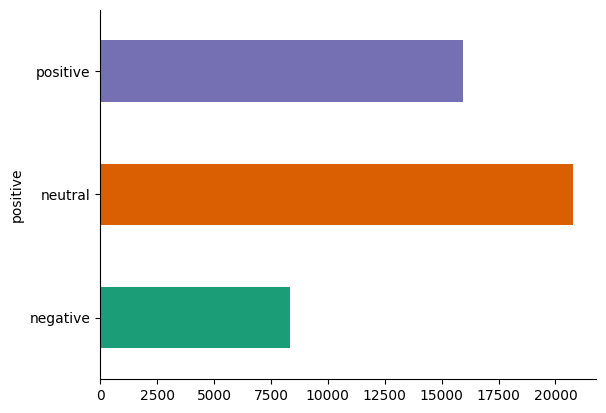

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('positive').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-7-367fd4c2b53e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='335104872099066692', y='positive', inner='box', palette='Dark2')


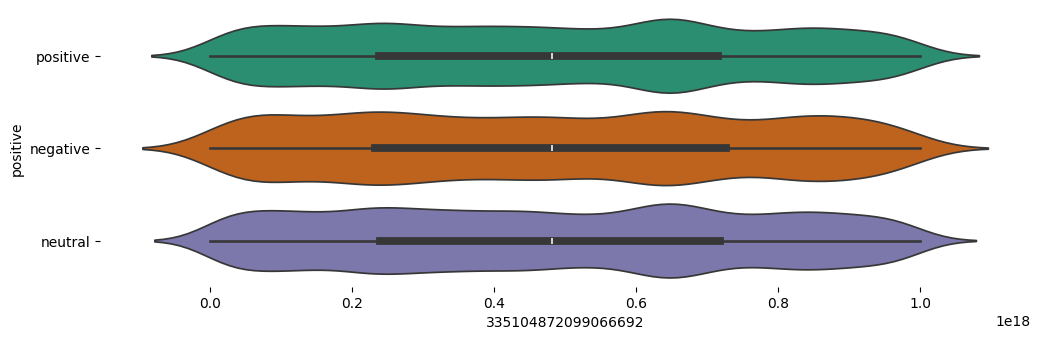

In [ ]:
figsize = (12, 1.2 * len(df['positive'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='335104872099066692', y='positive', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

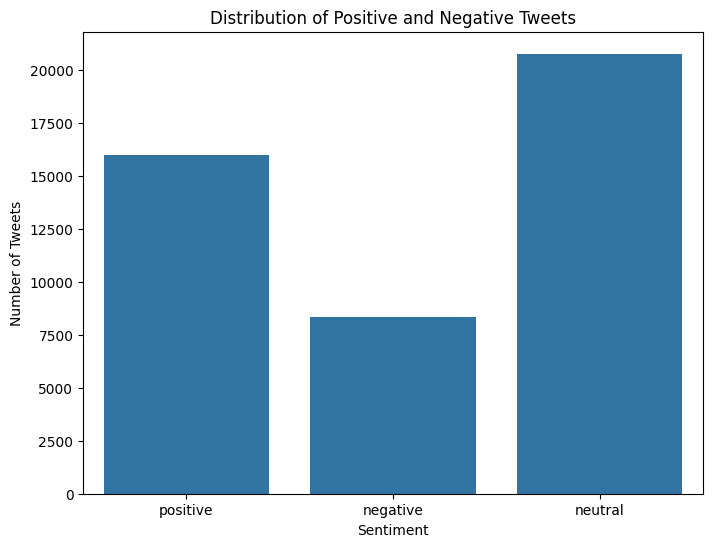

In [ ]:
# Countplot of 'positive' column
plt.figure(figsize=(8, 6))
sns.countplot(x='positive', data=df)
plt.title('Distribution of Positive and Negative Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

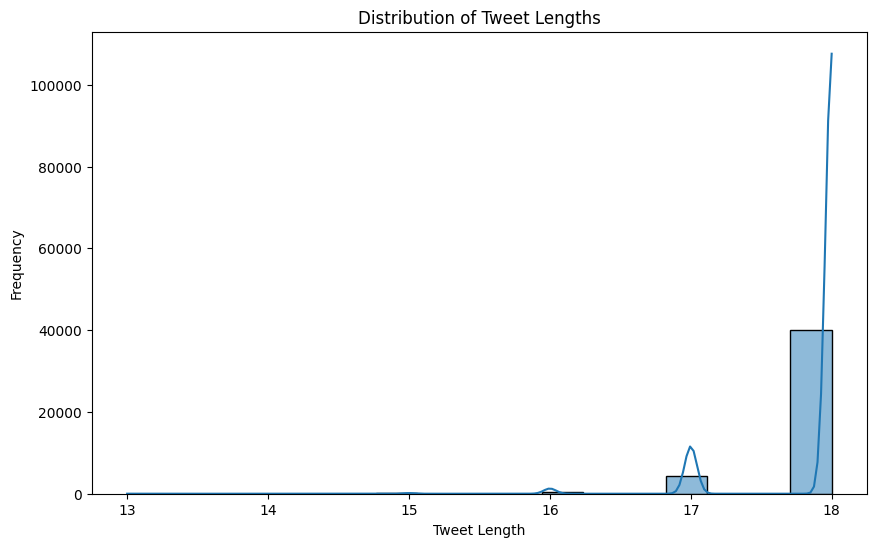

In [ ]:
# Distribution of tweet lengths
df['tweet_length'] = df['335104872099066692'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

#Subtask A

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def load_data(file_path):
  data = []
  with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) >= 3:
                tweet_id = parts[0]
                sentiment = parts[1]
                text = '\t'.join(parts[2:])
                data.append((tweet_id, sentiment, text))
  df = pd.DataFrame(data, columns=['tweet_id', 'sentiment', 'text'])
  return df

In [ ]:
file_path='/content/twitter-training-data.txt'

In [ ]:
df  = load_data(file_path)

In [ ]:
df.head()

,tweet_id,sentiment,text
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count..."
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...


In [ ]:
df.isna().sum()

,0
tweet_id,0
sentiment,0
text,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,20789
positive,15986
negative,8326


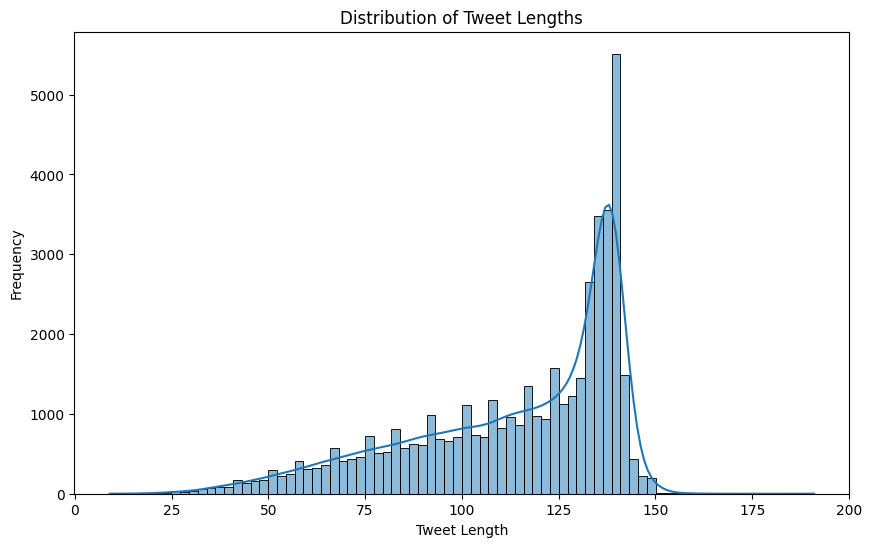

In [ ]:
df['tweet_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-27-12786423cf50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tweet_length'], kde=True)


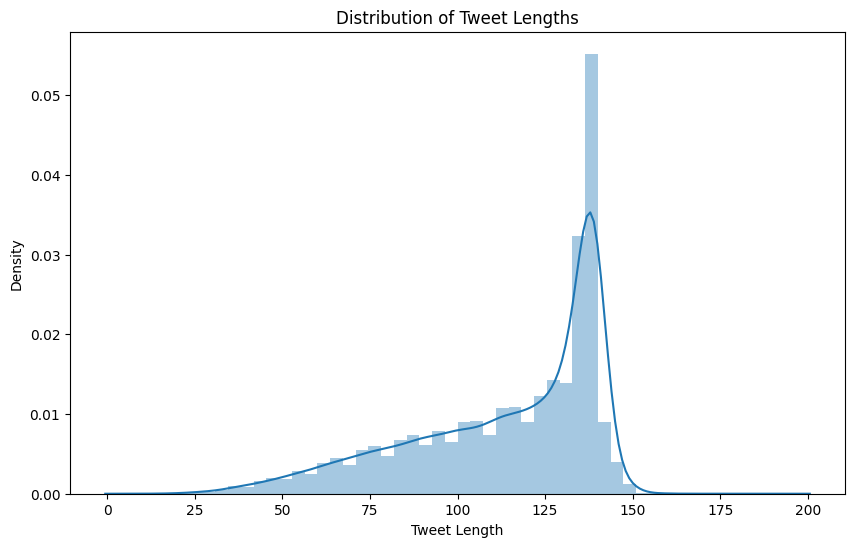

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()

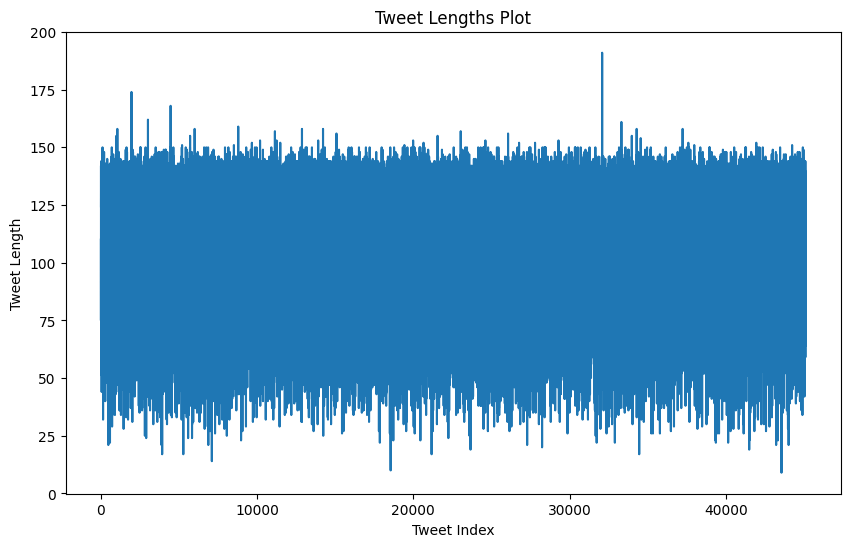

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['tweet_length'])
plt.title('Tweet Lengths Plot')
plt.xlabel('Tweet Index')
plt.ylabel('Tweet Length')
plt.show()

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)
  text = re.sub(r'@\w+', '', text)

  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  tokens = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

In [ ]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [ ]:
df

,tweet_id,sentiment,text,tweet_length,processed_text
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,110,felt privileged play foo fighter song guitar t...
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",142,pakistan may islamic country der lot true musl...
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,139,happy birthday coolest golfer bali may become ...
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,75,tmills going tucson th thursday
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,117,hmmmmm blacklivesmatter matter like rise kid d...
...,...,...,...,...,...
45096,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...,144,sunday cinema paul mccartney amp david gilmour...
45097,739323365061217061,neutral,"""14-Aug The day of independence, The day of ...",136,aug day independence day sacrifice muslim vict...
45098,681369726697754114,positive,"9 September has arrived, which means Apple's n...",134,september arrived mean apple new iphone hour a...
45099,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...,108,ill see tomorrow fun filled feeding league pro...


In [ ]:
X = df['processed_text']
y = df['sentiment']

In [ ]:
X

,processed_text
0,felt privileged play foo fighter song guitar t...
1,pakistan may islamic country der lot true musl...
2,happy birthday coolest golfer bali may become ...
3,tmills going tucson th thursday
4,hmmmmm blacklivesmatter matter like rise kid d...
...,...
45096,sunday cinema paul mccartney amp david gilmour...
45097,aug day independence day sacrifice muslim vict...
45098,september arrived mean apple new iphone hour a...
45099,ill see tomorrow fun filled feeding league pro...


In [ ]:
X.shape

(45101,)

In [ ]:
y

,sentiment
0,positive
1,positive
2,positive
3,negative
4,negative
...,...
45096,neutral
45097,neutral
45098,positive
45099,positive


In [ ]:
y.shape

(45101,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,processed_text
8688,monday u open murray federer amp konta action ...
8188,robbie keane score goal tonight may like
31763,know leo u know big come party leo tomorrow ni...
14296,forbes cupertino ca october apple ceo tim cook...
30575,right time admit chose mozartinspired nokia ri...
...,...
6781,jo whiley name checked sunday brunch morning o...
35213,ready party u march fourth marching band mthds...
23754,sanctuary savior tee inspired thewalkingdead s...
853,foo fighter saturday sunday night asking please


In [ ]:
X_test

,processed_text
37817,like nintendo could come tomorrow saying kirby...
42323,hillary starting campaign rd time
6736,think wednesday day lay bed day watching netfl...
21887,gucci bag superego good hope january flaunt du...
12283,stop fracking cuadrilla persecuting land defen...
...,...
10459,oh god want bioshock infinite right february f...
21767,people worried david price pitching tomorrow s...
758,madonna th year earned million back really exp...
1607,oliseh meet victor moses london super eagle co...


In [ ]:
y_train

,sentiment
8688,positive
8188,neutral
31763,neutral
14296,neutral
30575,positive
...,...
6781,neutral
35213,positive
23754,neutral
853,neutral


In [ ]:
y_test

,sentiment
37817,neutral
42323,neutral
6736,positive
21887,neutral
12283,negative
...,...
10459,positive
21767,positive
758,positive
1607,neutral


In [ ]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45101,), (45101,), (36080,), (36080,), (9021,), (9021,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [ ]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
print(X_train_tfidf)

  (0, 2884)	0.2933351475130817
  (0, 3164)	0.3693036894649117
  (0, 2936)	0.3906329396706117
  (0, 1500)	0.47856705890817364
  (0, 130)	0.3019273373782302
  (0, 30)	0.46496959134077215
  (0, 4475)	0.2976439396753231
  (1, 3700)	0.47519441032045673
  (1, 3829)	0.3640779050968468
  (1, 1764)	0.3520058022969074
  (1, 4526)	0.24796172161115196
  (1, 2710)	0.16802555890847057
  (1, 2515)	0.21435212299848666
  (1, 4528)	0.46802815284908156
  (1, 2731)	0.4037507625325843
  (2, 2379)	0.37513366509776475
  (2, 2482)	0.7052703389613516
  (2, 410)	0.2084293223317848
  (2, 832)	0.19207738971230046
  (2, 3239)	0.23642927158576693
  (2, 4486)	0.1269606350502375
  (2, 3052)	0.16294709812439861
  (2, 2592)	0.3526351694806758
  (2, 4510)	0.2420967851676615
  (3, 600)	0.3063107778647181
  :	:
  (36076, 2672)	0.26629422813627057
  (36076, 1621)	0.369834140042795
  (36076, 2674)	0.38770581332014675
  (36076, 2675)	0.3947794457009672
  (36076, 3804)	0.2906745959676595
  (36077, 3598)	0.281708280354224
  (3

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_test_tfidf)

  (0, 721)	0.308682831716424
  (0, 832)	0.2217359249534136
  (0, 841)	0.36319054988746735
  (0, 922)	0.2651579859927818
  (0, 1683)	0.20999771907161574
  (0, 1698)	0.2744148119605553
  (0, 2515)	0.19133668082458102
  (0, 2545)	0.34188794275515755
  (0, 3066)	0.3406750969859566
  (0, 3087)	0.2994903219574985
  (0, 3815)	0.3121857427736225
  (0, 4486)	0.14656453780272496
  (0, 4914)	0.23608739413887256
  (1, 621)	0.47412340203249737
  (1, 1983)	0.43316646768029893
  (1, 3551)	0.3028970454446544
  (1, 3565)	0.486616049312816
  (1, 4152)	0.42992346766434264
  (1, 4459)	0.27239277392408273
  (2, 363)	0.33112958305058354
  (2, 1028)	0.3519198551492314
  (2, 1294)	0.38865611820033374
  (2, 2453)	0.413894115842556
  (2, 3008)	0.32630611761856676
  (2, 3824)	0.2784048127270317
  :	:
  (9018, 4347)	0.16370447949435937
  (9018, 4382)	0.4301698510803432
  (9018, 4961)	0.24977775330557628
  (9019, 748)	0.2283294315500463
  (9019, 816)	0.23166684602348414
  (9019, 817)	0.25990452132617126
  (9019, 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

In [ ]:
best_accuracy = 0
best_model_name = ""
best_model = None
best_y_pred = None

In [ ]:
 for name, model in models.items():
  print(f"\nTraining {name}...")
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy:.4f}")
  if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model
        best_y_pred = y_pred


Training Logistic Regression...
Logistic Regression Accuracy: 0.6488

Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.6215

Training Linear SVM...
Linear SVM Accuracy: 0.6394

Training Random Forest...
Random Forest Accuracy: 0.6293

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5897


In [ ]:
print(f"\nDetailed evaluation for the best model ({best_model_name}):")


Detailed evaluation for the best model (Logistic Regression):


In [ ]:
report = classification_report(y_test, best_y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



In [ ]:
# Visualize the confusion matrix
def plot_confusion_matrix(cm, classes):
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

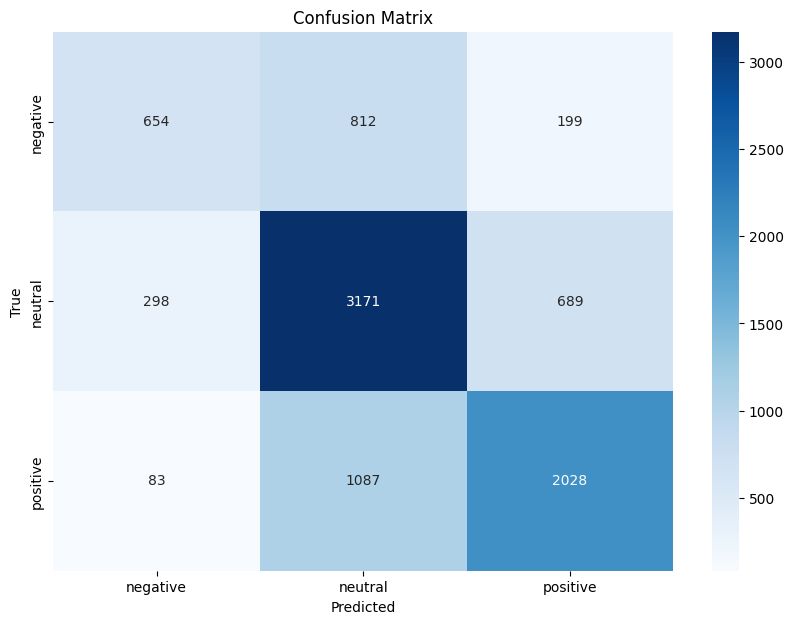

In [ ]:
cm = confusion_matrix(y_test, best_y_pred)
plot_confusion_matrix(cm, classes=sorted(df['sentiment'].unique()))

In [ ]:
def plot_model_comparison(models, X_test_tfidf, y_test):
  accuracy_scores = {}
  for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()))
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title("Model Comparison by Accuracy")
    plt.show()
    # Plotting confusion matrix for each model
    for name, model in models.items():
      y_pred = model.predict(X_test_tfidf)
      cm = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(df['sentiment'].unique()),
                    yticklabels=sorted(df['sentiment'].unique()))
      plt.xlabel('Predicted')
      plt.ylabel('True')
      plt.title(f'Confusion Matrix for {name}')
      plt.show()
      print(f"\nClassification Report for {name}:\n",classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6488


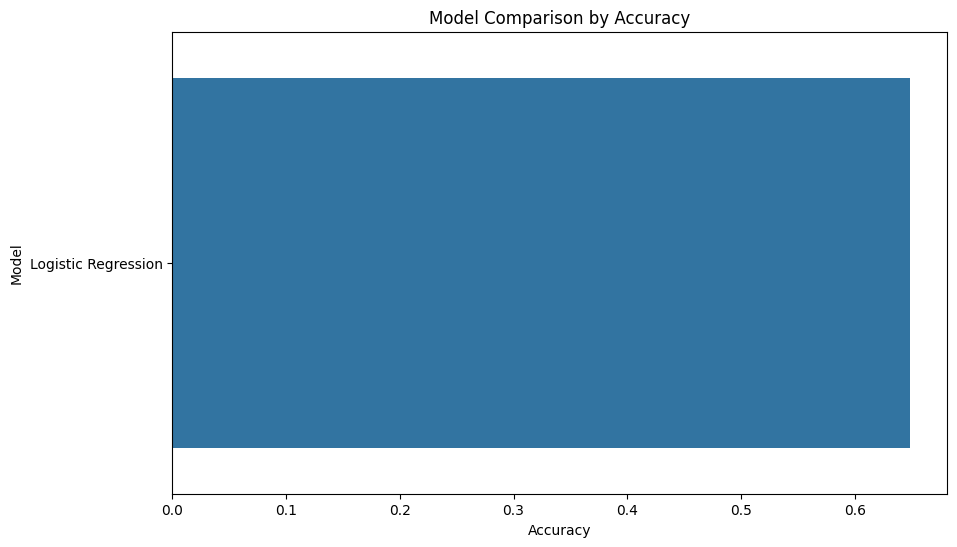

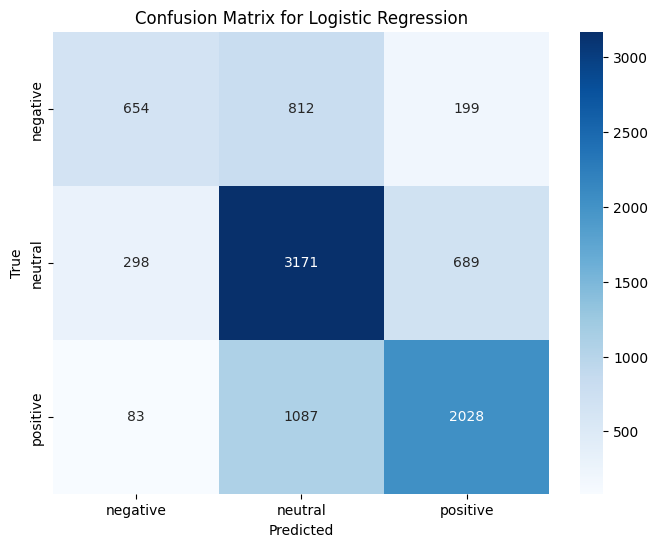


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



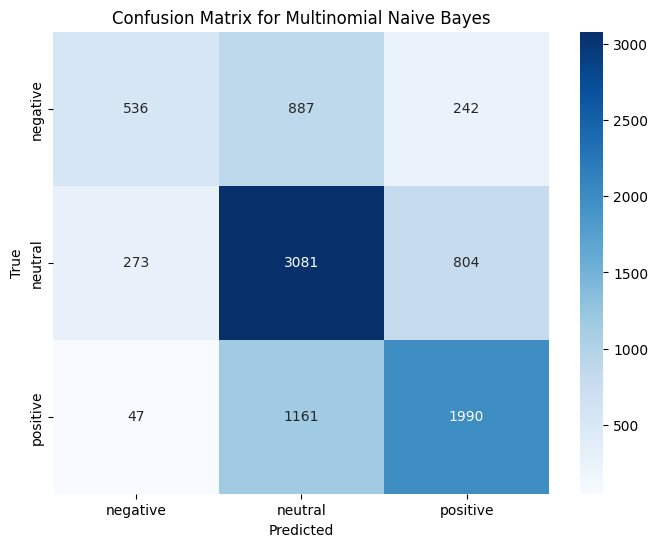


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

    negative       0.63      0.32      0.43      1665
     neutral       0.60      0.74      0.66      4158
    positive       0.66      0.62      0.64      3198

    accuracy                           0.62      9021
   macro avg       0.63      0.56      0.58      9021
weighted avg       0.62      0.62      0.61      9021



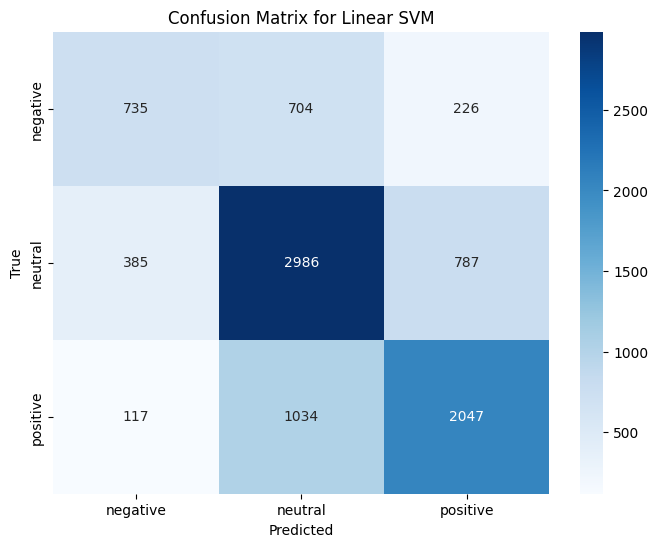


Classification Report for Linear SVM:
               precision    recall  f1-score   support

    negative       0.59      0.44      0.51      1665
     neutral       0.63      0.72      0.67      4158
    positive       0.67      0.64      0.65      3198

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.64      0.64      0.64      9021



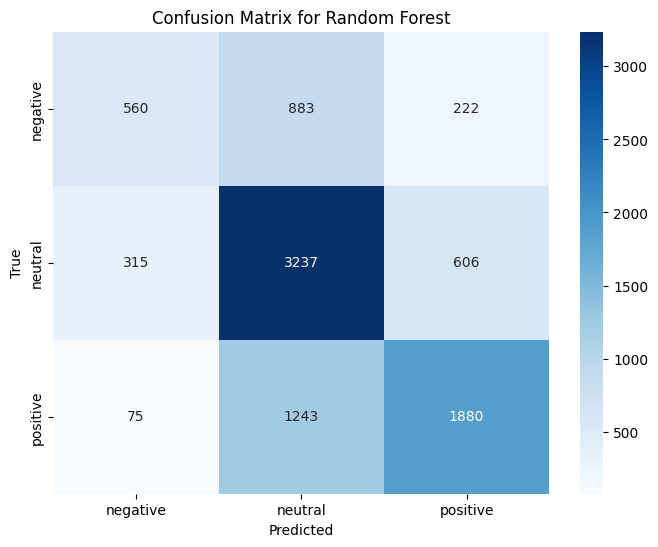


Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.59      0.34      0.43      1665
     neutral       0.60      0.78      0.68      4158
    positive       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.57      0.58      9021
weighted avg       0.63      0.63      0.62      9021



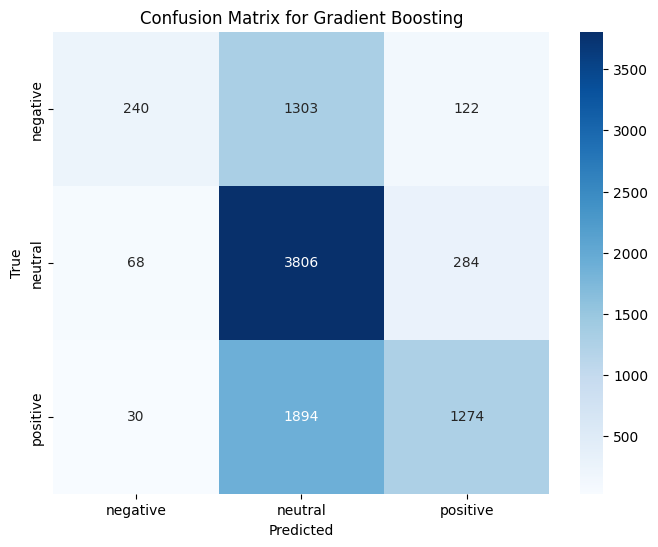


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    negative       0.71      0.14      0.24      1665
     neutral       0.54      0.92      0.68      4158
    positive       0.76      0.40      0.52      3198

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.54      9021

Multinomial Naive Bayes Accuracy: 0.6215


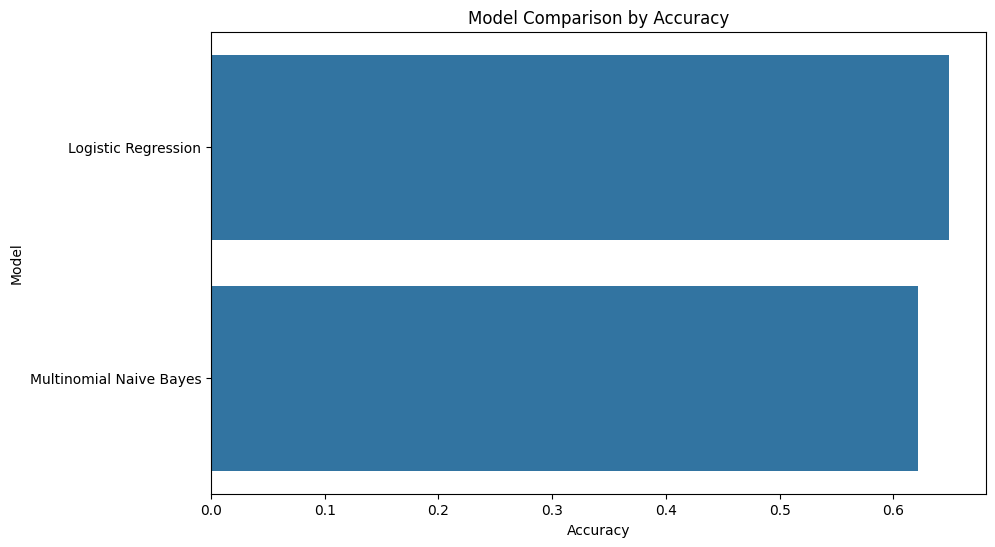

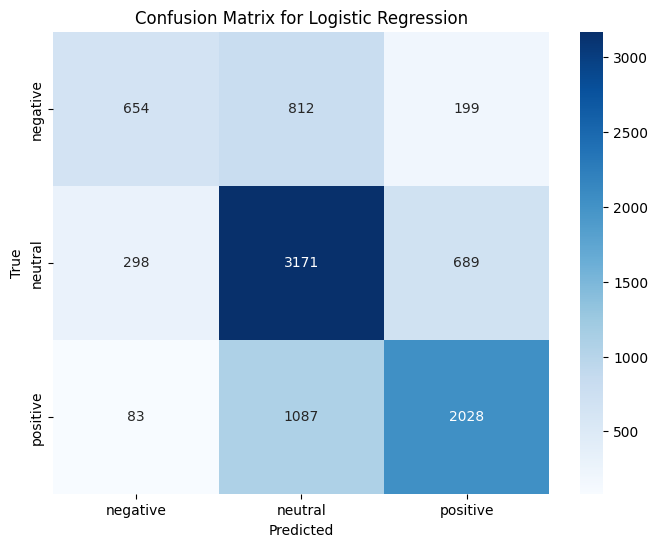


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



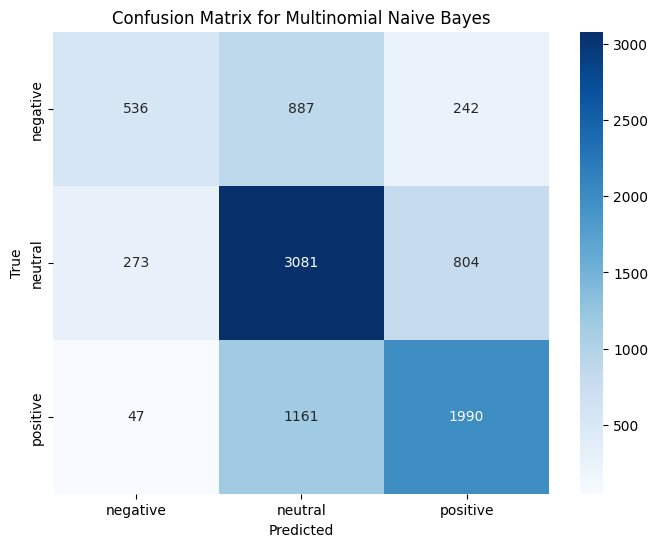


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

    negative       0.63      0.32      0.43      1665
     neutral       0.60      0.74      0.66      4158
    positive       0.66      0.62      0.64      3198

    accuracy                           0.62      9021
   macro avg       0.63      0.56      0.58      9021
weighted avg       0.62      0.62      0.61      9021



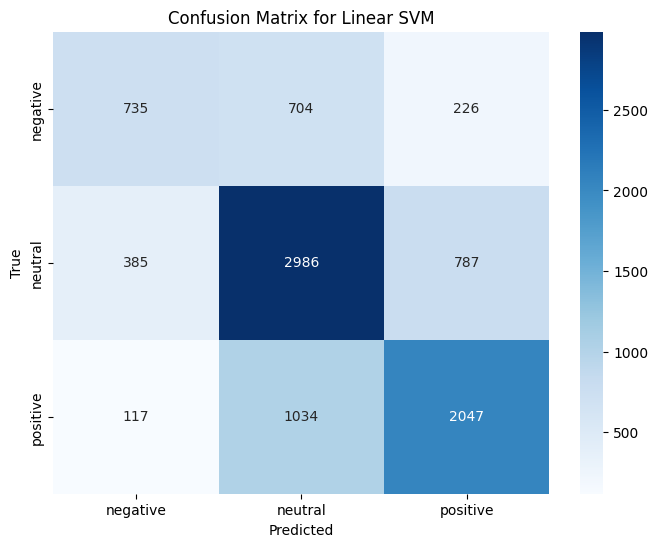


Classification Report for Linear SVM:
               precision    recall  f1-score   support

    negative       0.59      0.44      0.51      1665
     neutral       0.63      0.72      0.67      4158
    positive       0.67      0.64      0.65      3198

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.64      0.64      0.64      9021



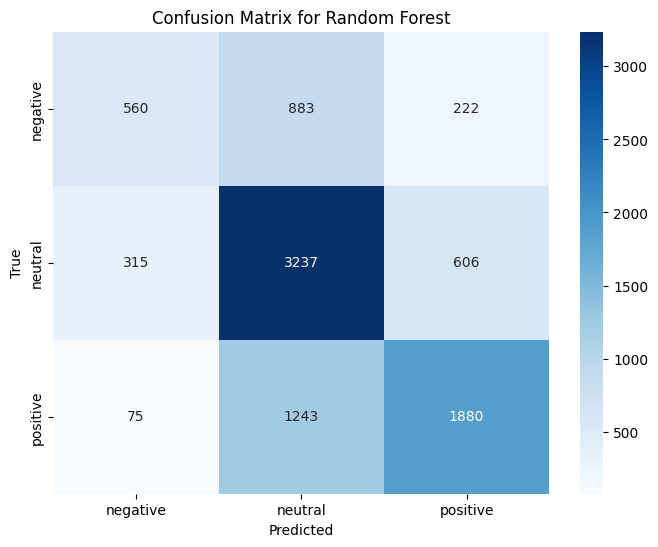


Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.59      0.34      0.43      1665
     neutral       0.60      0.78      0.68      4158
    positive       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.57      0.58      9021
weighted avg       0.63      0.63      0.62      9021



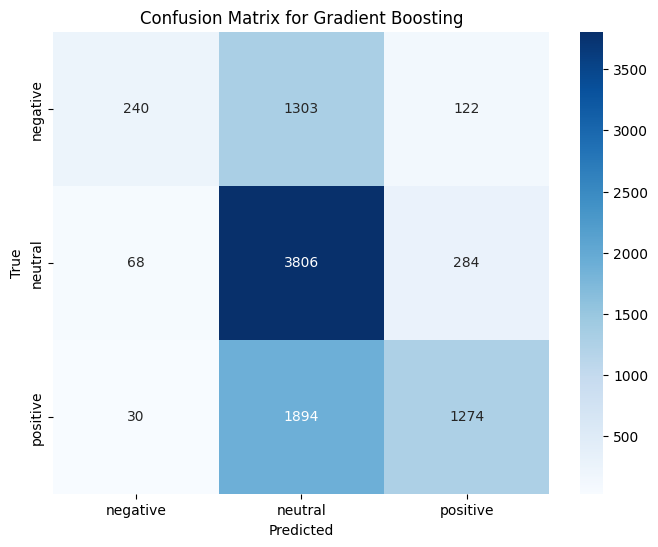


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    negative       0.71      0.14      0.24      1665
     neutral       0.54      0.92      0.68      4158
    positive       0.76      0.40      0.52      3198

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.54      9021

Linear SVM Accuracy: 0.6394


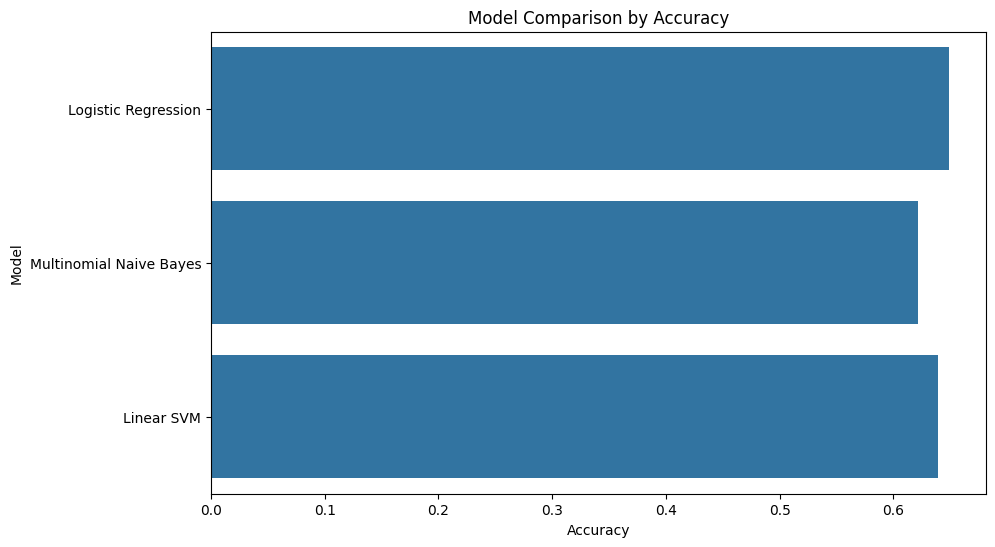

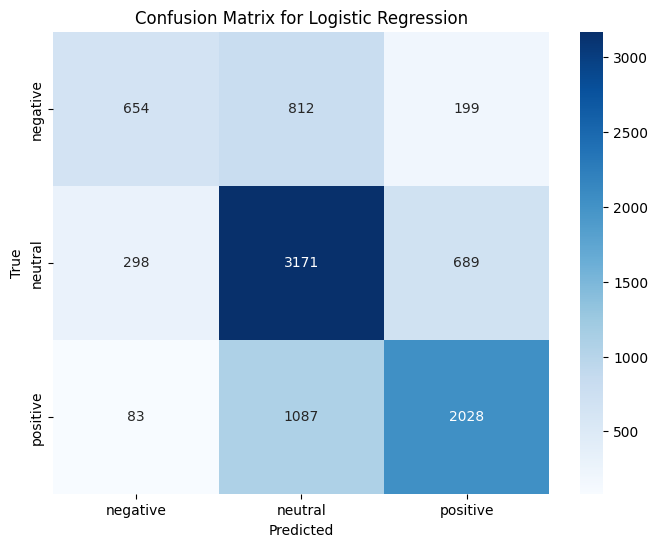


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



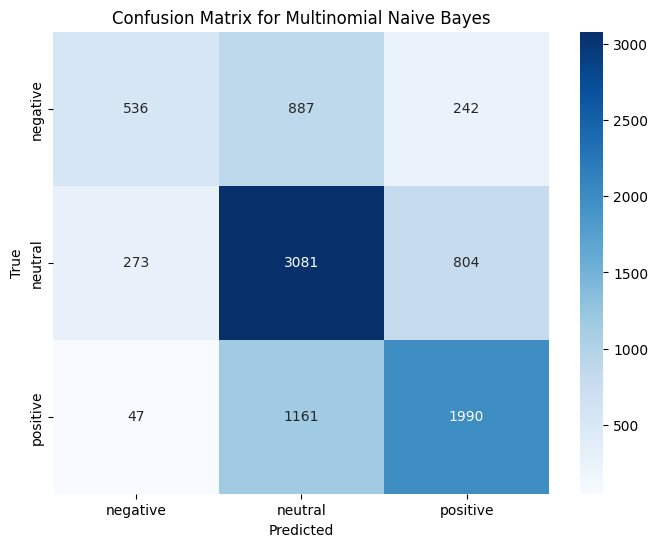


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

    negative       0.63      0.32      0.43      1665
     neutral       0.60      0.74      0.66      4158
    positive       0.66      0.62      0.64      3198

    accuracy                           0.62      9021
   macro avg       0.63      0.56      0.58      9021
weighted avg       0.62      0.62      0.61      9021



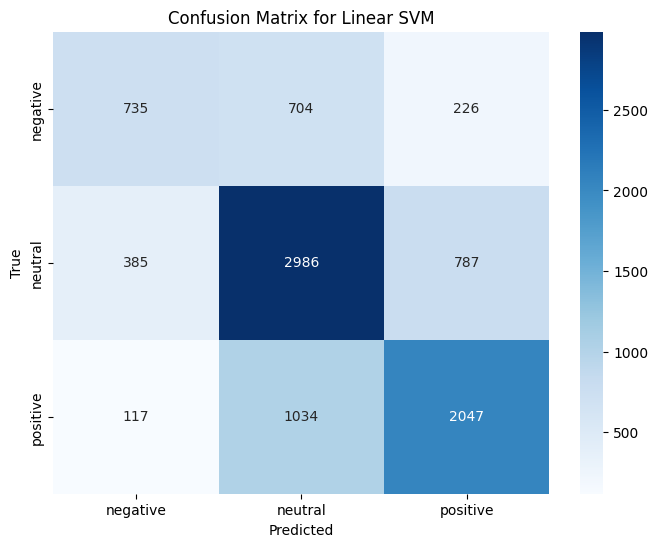


Classification Report for Linear SVM:
               precision    recall  f1-score   support

    negative       0.59      0.44      0.51      1665
     neutral       0.63      0.72      0.67      4158
    positive       0.67      0.64      0.65      3198

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.64      0.64      0.64      9021



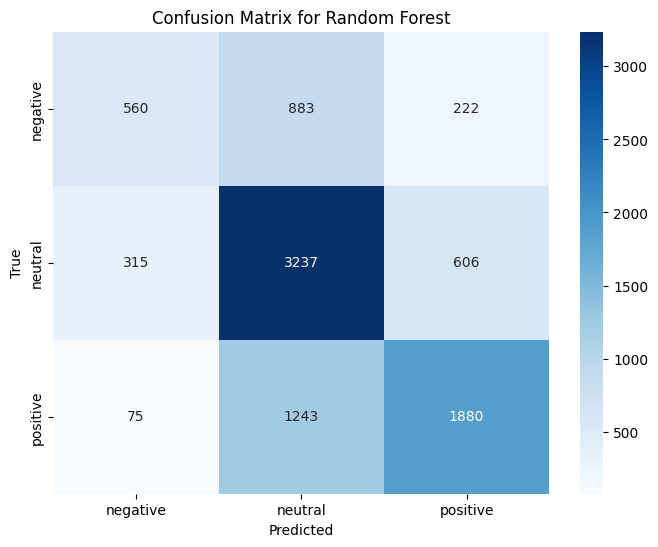


Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.59      0.34      0.43      1665
     neutral       0.60      0.78      0.68      4158
    positive       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.57      0.58      9021
weighted avg       0.63      0.63      0.62      9021



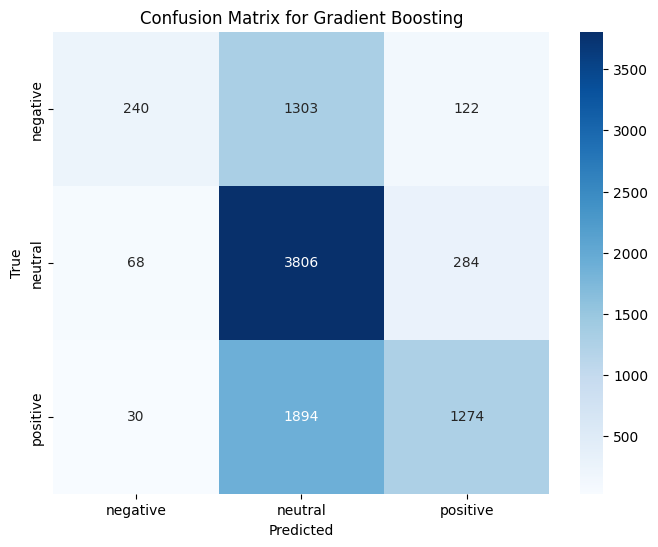


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    negative       0.71      0.14      0.24      1665
     neutral       0.54      0.92      0.68      4158
    positive       0.76      0.40      0.52      3198

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.54      9021

Random Forest Accuracy: 0.6293


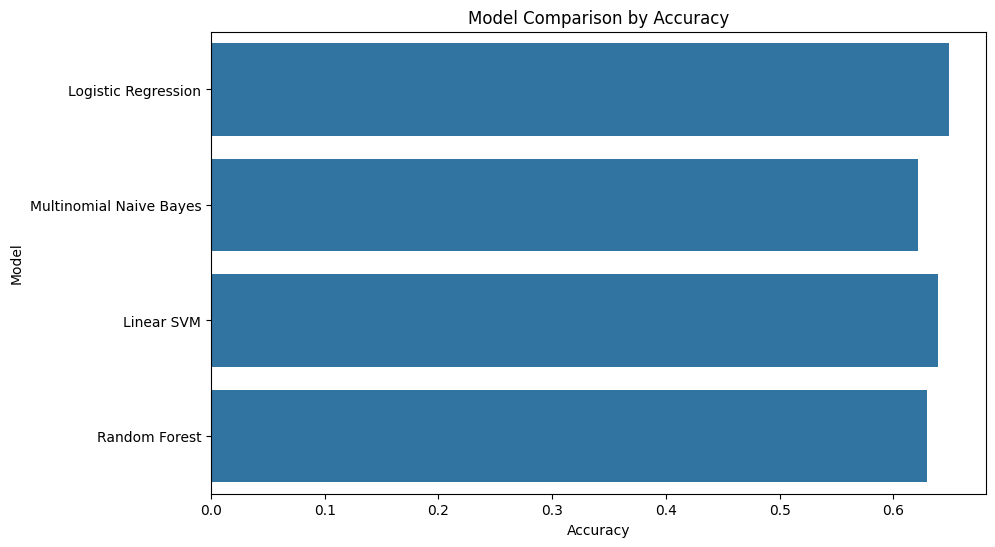

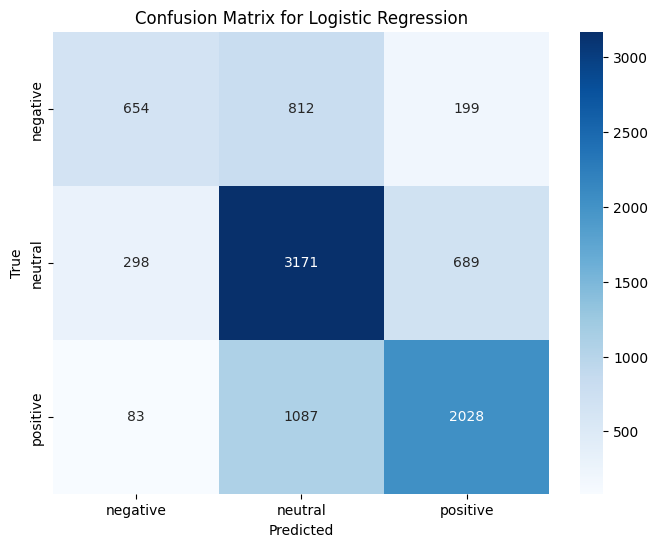


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



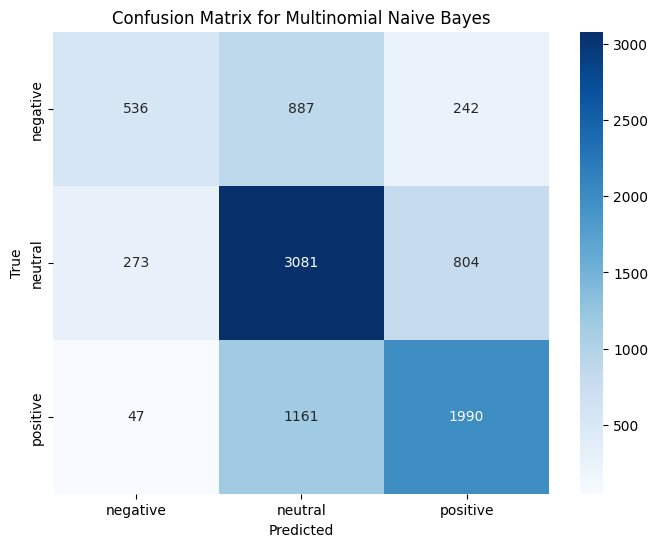


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

    negative       0.63      0.32      0.43      1665
     neutral       0.60      0.74      0.66      4158
    positive       0.66      0.62      0.64      3198

    accuracy                           0.62      9021
   macro avg       0.63      0.56      0.58      9021
weighted avg       0.62      0.62      0.61      9021



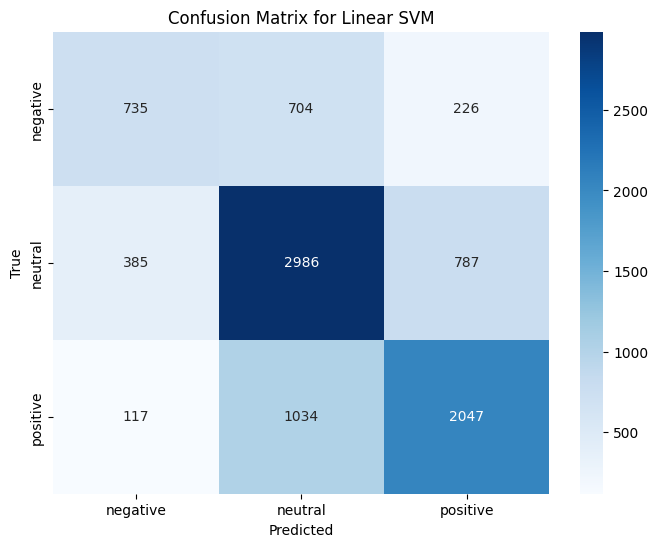


Classification Report for Linear SVM:
               precision    recall  f1-score   support

    negative       0.59      0.44      0.51      1665
     neutral       0.63      0.72      0.67      4158
    positive       0.67      0.64      0.65      3198

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.64      0.64      0.64      9021



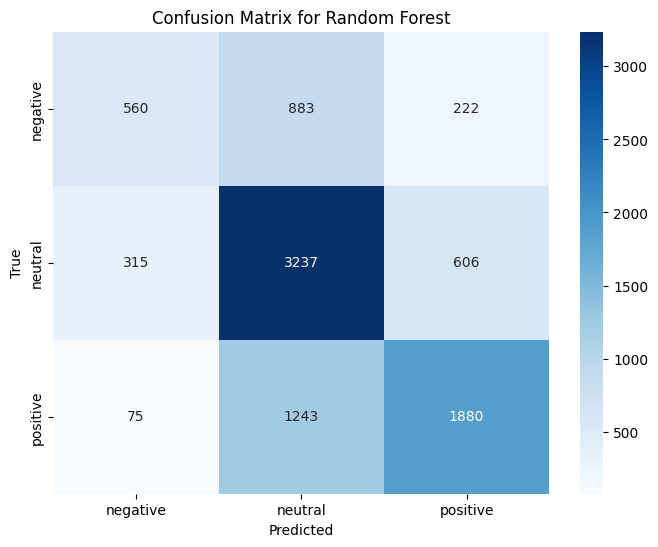


Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.59      0.34      0.43      1665
     neutral       0.60      0.78      0.68      4158
    positive       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.57      0.58      9021
weighted avg       0.63      0.63      0.62      9021



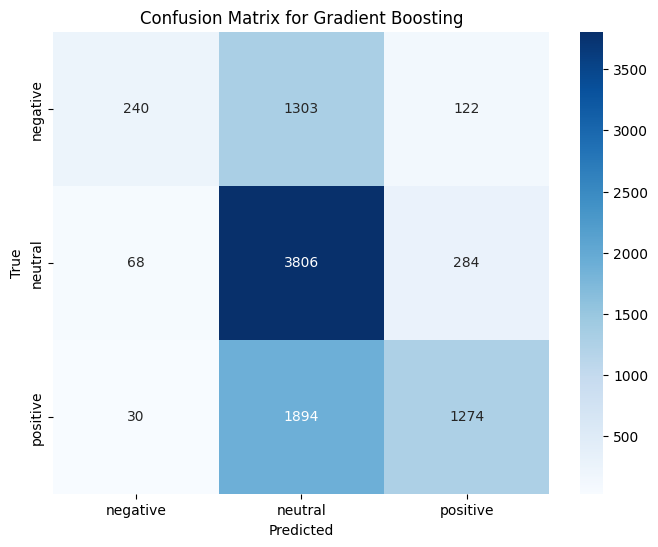


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    negative       0.71      0.14      0.24      1665
     neutral       0.54      0.92      0.68      4158
    positive       0.76      0.40      0.52      3198

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.54      9021

Gradient Boosting Accuracy: 0.5897


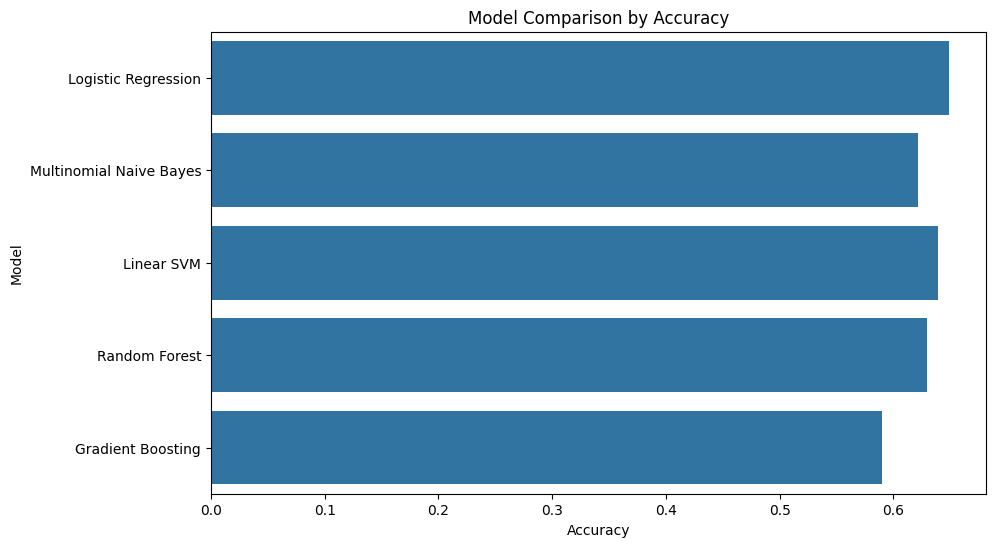

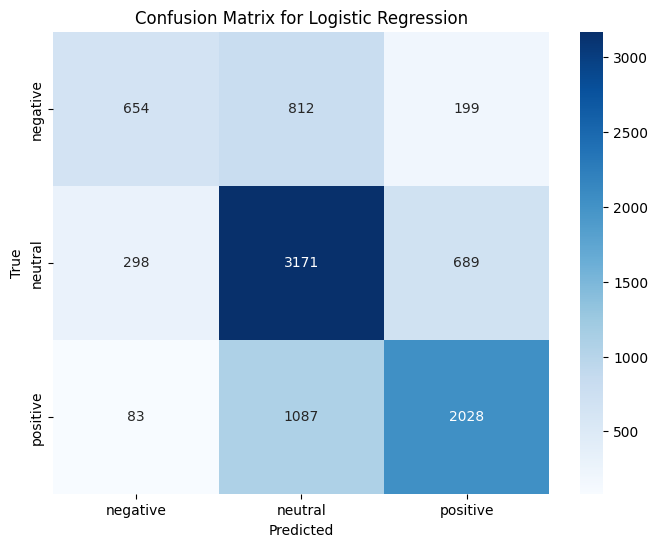


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       0.63      0.39      0.48      1665
     neutral       0.63      0.76      0.69      4158
    positive       0.70      0.63      0.66      3198

    accuracy                           0.65      9021
   macro avg       0.65      0.60      0.61      9021
weighted avg       0.65      0.65      0.64      9021



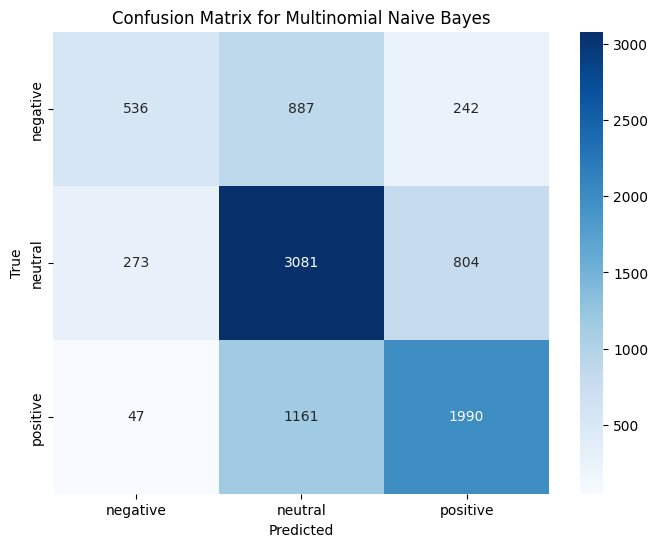


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

    negative       0.63      0.32      0.43      1665
     neutral       0.60      0.74      0.66      4158
    positive       0.66      0.62      0.64      3198

    accuracy                           0.62      9021
   macro avg       0.63      0.56      0.58      9021
weighted avg       0.62      0.62      0.61      9021



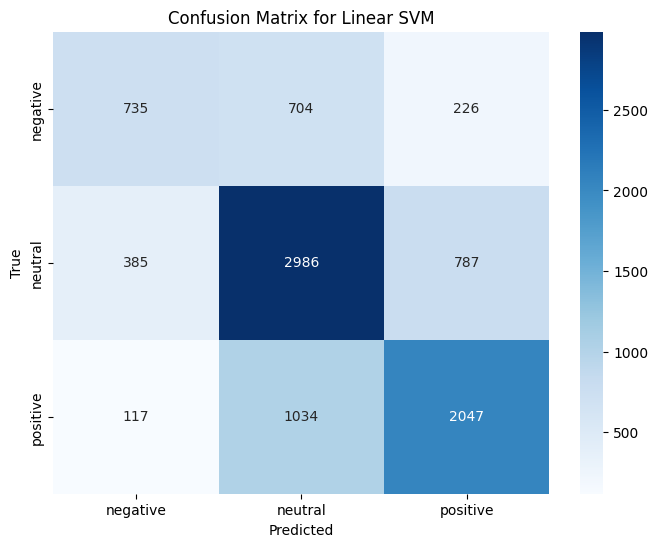


Classification Report for Linear SVM:
               precision    recall  f1-score   support

    negative       0.59      0.44      0.51      1665
     neutral       0.63      0.72      0.67      4158
    positive       0.67      0.64      0.65      3198

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.64      0.64      0.64      9021



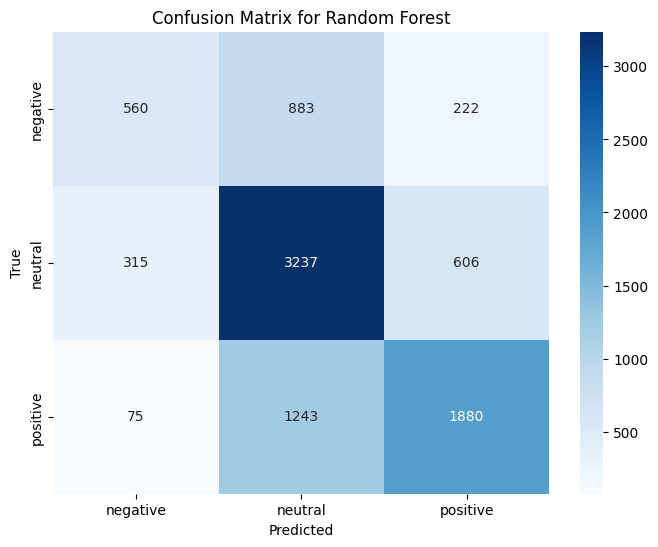


Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.59      0.34      0.43      1665
     neutral       0.60      0.78      0.68      4158
    positive       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.57      0.58      9021
weighted avg       0.63      0.63      0.62      9021



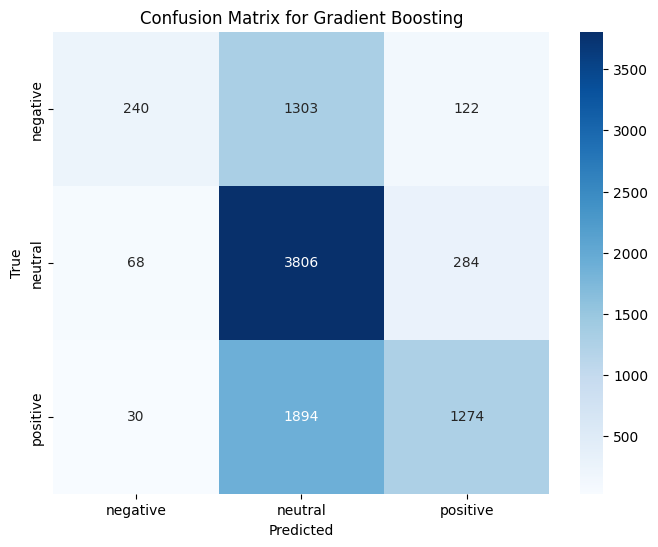


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    negative       0.71      0.14      0.24      1665
     neutral       0.54      0.92      0.68      4158
    positive       0.76      0.40      0.52      3198

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.54      9021



In [ ]:
plot_model_comparison(models, X_test_tfidf, y_test)

#Subtasks B-C

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [67]:
!unzip '/content/twitter-training-data.txt(1).zip'

Archive:  /content/twitter-training-data.txt(1).zip
replace twitter-training-data.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: twitter-training-data.txt  


In [68]:
file='/content/twitter-training-data.txt'

In [69]:
from tkinter import YES
def load_data(file_path):
  data=[]
  with open(file_path, 'r', encoding='utf-8') as f:
    for i in f:
      parts = i.strip().split('\t')
      if len(parts) >= 3:
        tweet_id = parts[0]
        sentiment = parts[1]
        text = '\t'.join(parts[2:])
        hashtags = re.findall(r'#(\w+)', text)
        mentions = re.findall(r'@(\w+)', text)
        potential_topics= hashtags + mentions
        if not potential_topics:
          topic = "general"
        else:
          topic = potential_topics[0]
        data.append((tweet_id, sentiment, text, topic))
  df = pd.DataFrame(data, columns=['tweet_id', 'sentiment', 'text', 'topic'])
  return df

In [70]:
data = load_data(file)
data.head()

,tweet_id,sentiment,text,topic
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,general
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",AaqibAfzaal
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,tjvictoriacnd
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,SimpplyA
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,BlackLivesMatter


In [71]:
import nltk

In [72]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  tokens = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

In [76]:
data['processed_text'] = data['text'].apply(preprocess_text)

In [77]:
data['topic_processed'] = data['topic'].apply(preprocess_text)

In [78]:
data['topic_processed']

,topic_processed
0,general
1,aaqibafzaal
2,tjvictoriacnd
3,simpplya
4,blacklivesmatter
...,...
45096,general
45097,general
45098,general
45099,general


In [79]:
data['processed_text']

,processed_text
0,felt privileged play foo fighter song guitar t...
1,pakistan may islamic country der lot true musl...
2,happy birthday coolest golfer bali may become ...
3,tmills going tucson th thursday
4,hmmmmm blacklivesmatter matter like rise kid d...
...,...
45096,sunday cinema paul mccartney amp david gilmour...
45097,aug day independence day sacrifice muslim vict...
45098,september arrived mean apple new iphone hour a...
45099,ill see tomorrow fun filled feeding league pro...


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
data

,tweet_id,sentiment,text,topic,processed_text,topic_processed
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,general,felt privileged play foo fighter song guitar t...,general
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",AaqibAfzaal,pakistan may islamic country der lot true musl...,aaqibafzaal
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,tjvictoriacnd,happy birthday coolest golfer bali may become ...,tjvictoriacnd
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,SimpplyA,tmills going tucson th thursday,simpplya
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,BlackLivesMatter,hmmmmm blacklivesmatter matter like rise kid d...,blacklivesmatter
...,...,...,...,...,...,...
45096,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...,general,sunday cinema paul mccartney amp david gilmour...,general
45097,739323365061217061,neutral,"""14-Aug The day of independence, The day of ...",general,aug day independence day sacrifice muslim vict...,general
45098,681369726697754114,positive,"9 September has arrived, which means Apple's n...",general,september arrived mean apple new iphone hour a...,general
45099,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...,general,ill see tomorrow fun filled feeding league pro...,general


In [83]:
data

,tweet_id,sentiment,text,topic,processed_text,topic_processed
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,general,felt privileged play foo fighter song guitar t...,general
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",AaqibAfzaal,pakistan may islamic country der lot true musl...,aaqibafzaal
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,tjvictoriacnd,happy birthday coolest golfer bali may become ...,tjvictoriacnd
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,SimpplyA,tmills going tucson th thursday,simpplya
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,BlackLivesMatter,hmmmmm blacklivesmatter matter like rise kid d...,blacklivesmatter
...,...,...,...,...,...,...
45096,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...,general,sunday cinema paul mccartney amp david gilmour...,general
45097,739323365061217061,neutral,"""14-Aug The day of independence, The day of ...",general,aug day independence day sacrifice muslim vict...,general
45098,681369726697754114,positive,"9 September has arrived, which means Apple's n...",general,september arrived mean apple new iphone hour a...,general
45099,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...,general,ill see tomorrow fun filled feeding league pro...,general


In [84]:
sentiment_mapping_3= {'positive': 1, 'negative': 2, 'neutral':0}
sentiment_binary_mapping = {'positive': 1, 'negative': 0}

In [85]:
data['sentiment_three'] = data['sentiment'].map(sentiment_mapping_3).fillna(-1).astype(int)

In [86]:
data['sentiment_binary_mapping'] = data['sentiment'].map(sentiment_binary_mapping).fillna(-1).astype(int)

In [87]:
X = data[['processed_text', 'topic_processed']]
y_binary = data['sentiment_binary_mapping']
y_three = data['sentiment_three']

In [88]:
data

,tweet_id,sentiment,text,topic,processed_text,topic_processed,sentiment_three,sentiment_binary_mapping
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,general,felt privileged play foo fighter song guitar t...,general,1,1
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",AaqibAfzaal,pakistan may islamic country der lot true musl...,aaqibafzaal,1,1
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,tjvictoriacnd,happy birthday coolest golfer bali may become ...,tjvictoriacnd,1,1
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,SimpplyA,tmills going tucson th thursday,simpplya,2,0
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,BlackLivesMatter,hmmmmm blacklivesmatter matter like rise kid d...,blacklivesmatter,2,0
...,...,...,...,...,...,...,...,...
45096,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...,general,sunday cinema paul mccartney amp david gilmour...,general,0,-1
45097,739323365061217061,neutral,"""14-Aug The day of independence, The day of ...",general,aug day independence day sacrifice muslim vict...,general,0,-1
45098,681369726697754114,positive,"9 September has arrived, which means Apple's n...",general,september arrived mean apple new iphone hour a...,general,1,1
45099,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...,general,ill see tomorrow fun filled feeding league pro...,general,1,1


In [89]:
y_binary

,sentiment_binary_mapping
0,1
1,1
2,1
3,0
4,0
...,...
45096,-1
45097,-1
45098,1
45099,1


In [90]:
y_three

,sentiment_three
0,1
1,1
2,1
3,2
4,2
...,...
45096,0
45097,0
45098,1
45099,1


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(data['processed_text'])

In [92]:
print(X_vec)

  (0, 12816)	0.33105193859327675
  (0, 29100)	0.3977091012401561
  (0, 28215)	0.21192205506352585
  (0, 13430)	0.24799556652791147
  (0, 12965)	0.2425052426922636
  (0, 34422)	0.2276164823872721
  (0, 15566)	0.3475559741320025
  (0, 37731)	0.18307713816873467
  (0, 26426)	0.17022067235214142
  (0, 28279)	0.4487015149896806
  (0, 14651)	0.314547903054551
  (0, 32336)	0.1778773922565194
  (1, 27136)	0.3045113030765936
  (1, 22772)	0.12112605616039983
  (1, 18579)	0.32232116854177056
  (1, 7990)	0.48577424811087067
  (1, 9426)	0.39018182504669446
  (1, 21693)	0.23225192232484781
  (1, 38456)	0.2396274523184628
  (1, 24508)	0.2244465532356313
  (1, 17915)	0.2836339154457073
  (1, 21734)	0.18299668050846968
  (1, 32014)	0.35329509301330275
  (2, 22772)	0.09528421215466365
  (2, 15954)	0.15425246425213687
  :	:
  (45098, 32968)	0.25700271144185577
  (45098, 1810)	0.2792537705990709
  (45098, 26192)	0.32881366739506734
  (45098, 18448)	0.31145521877987903
  (45098, 17111)	0.2827169534954979
 

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train_binary, y_test_binary, y_train_three, y_test_three = train_test_split(
     X_vec, y_binary, y_three, test_size=0.2, random_state=42, stratify=y_binary
)

In [97]:
models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=100, C=1.0),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

In [95]:
best_accuracy = 0
best_model_name = ""
best_model = None
best_y_pred = None

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [101]:
for name, model_binary in models_binary.items():

  print(f"\nTraining {name}...")
  model_binary.fit(X_train, y_train_binary)
  y_pred_binary = model_binary.predict(X_test)
  accuracy = accuracy_score(y_test_binary, y_pred_binary)
  print(f"{name} Accuracy: {accuracy:.4f}")
  if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model
        best_y_pred = y_pred


Training Logistic Regression...
Logistic Regression Accuracy: 0.6496

Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.6014

Training Linear SVM...
Linear SVM Accuracy: 0.6350

Training Random Forest...
Random Forest Accuracy: 0.6281

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5921


In [102]:
def plot_model_comparison(models, X_test, y_test):
  accuracy_scores = {}
  for name, model in models_binary.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_binary, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()))
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title("Model Comparison by Accuracy")
    plt.show()
    # Plotting confusion matrix for each model
    for name, model in models.items():
      y_pred = model.predict(X_test_tfidf)
      cm = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(df['sentiment'].unique()),
                    yticklabels=sorted(df['sentiment'].unique()))
      plt.xlabel('Predicted')
      plt.ylabel('True')
      plt.title(f'Confusion Matrix for {name}')
      plt.show()
      print(f"\nClassification Report for {name}:\n",classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6496


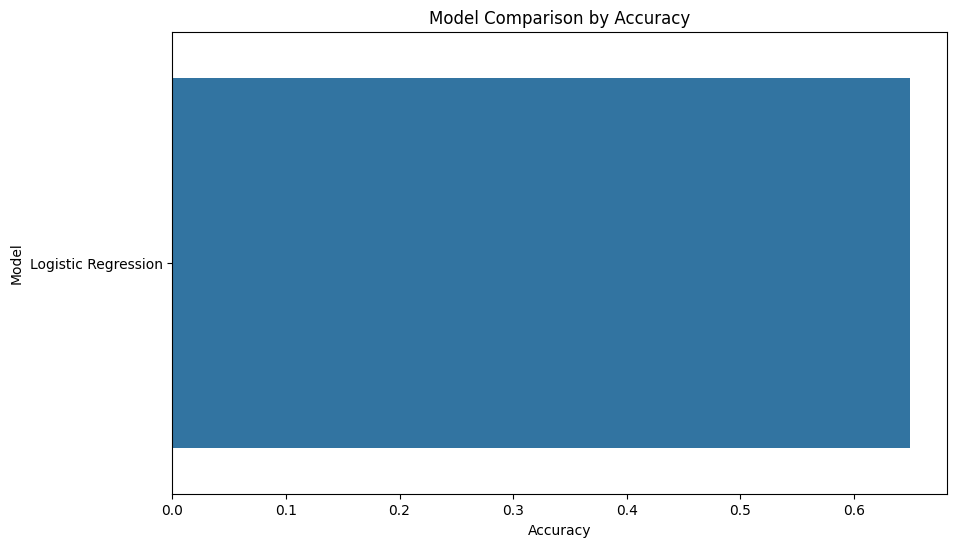

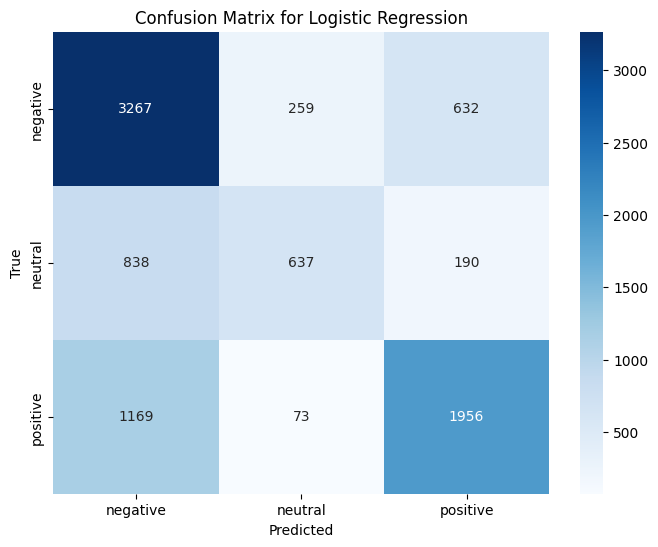


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



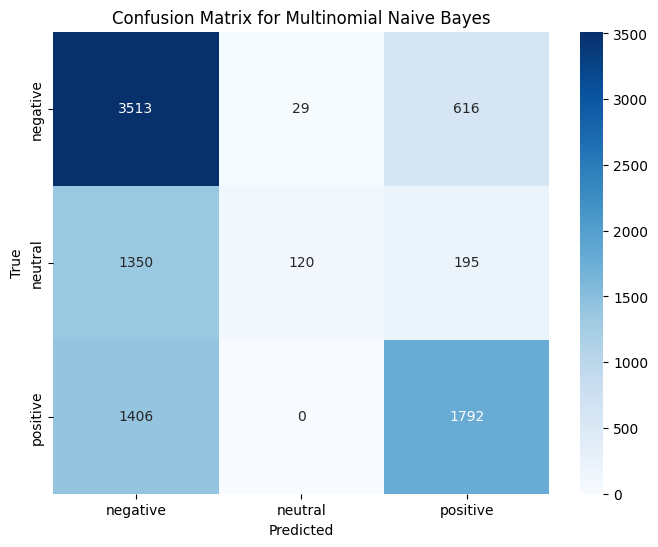


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

          -1       0.56      0.84      0.67      4158
           0       0.81      0.07      0.13      1665
           1       0.69      0.56      0.62      3198

    accuracy                           0.60      9021
   macro avg       0.68      0.49      0.47      9021
weighted avg       0.65      0.60      0.55      9021



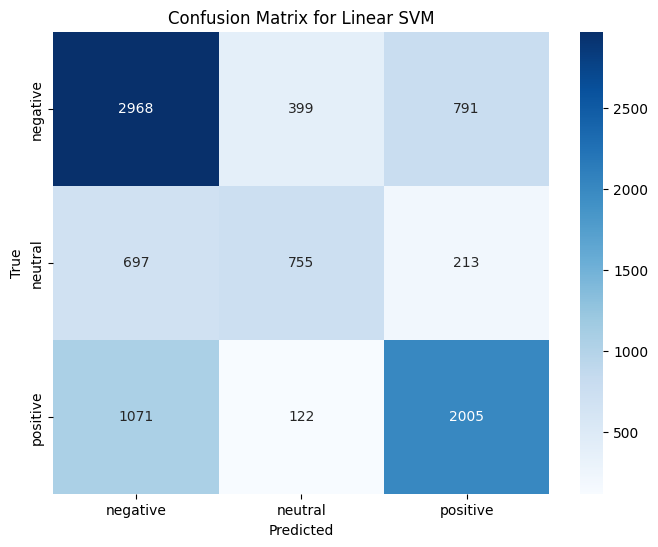


Classification Report for Linear SVM:
               precision    recall  f1-score   support

          -1       0.63      0.71      0.67      4158
           0       0.59      0.45      0.51      1665
           1       0.67      0.63      0.65      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.63      0.63      9021



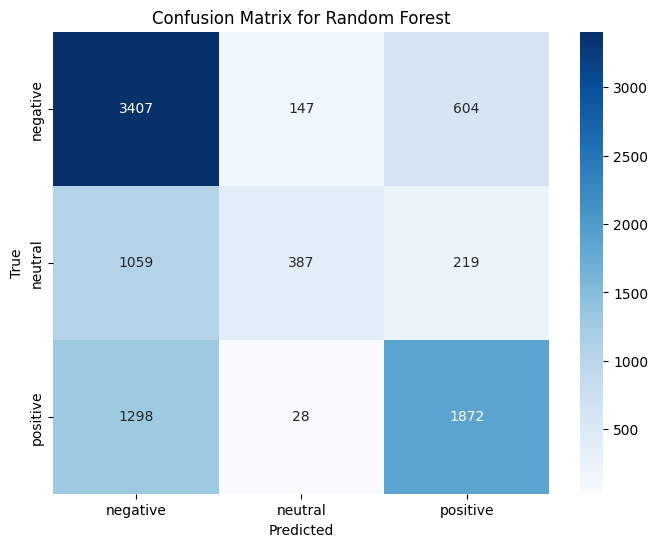


Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       0.59      0.82      0.69      4158
           0       0.69      0.23      0.35      1665
           1       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.65      0.63      0.61      9021



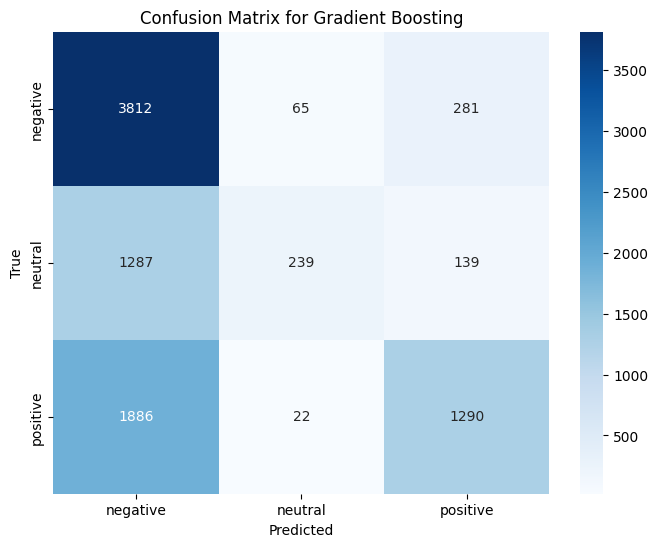


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

          -1       0.55      0.92      0.68      4158
           0       0.73      0.14      0.24      1665
           1       0.75      0.40      0.53      3198

    accuracy                           0.59      9021
   macro avg       0.68      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021

Multinomial Naive Bayes Accuracy: 0.6014


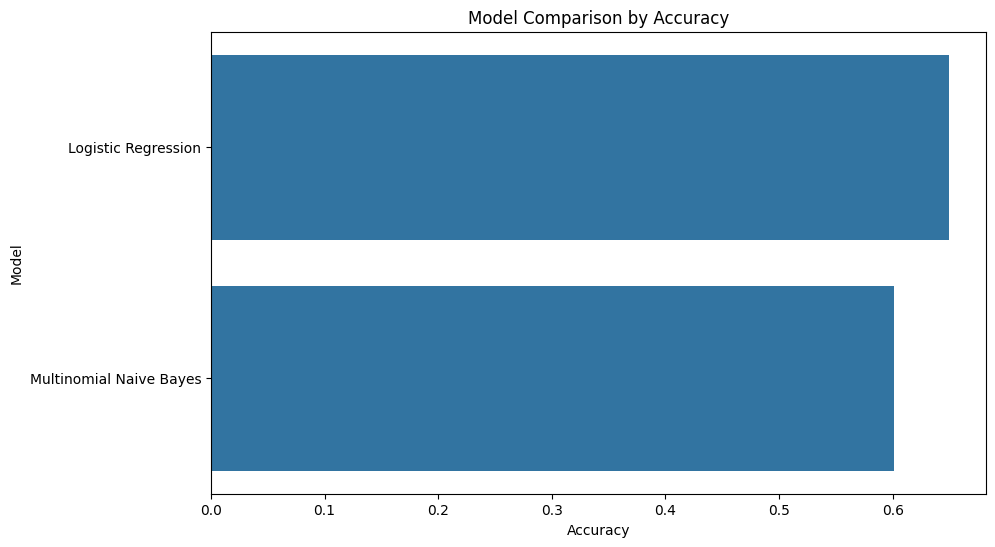

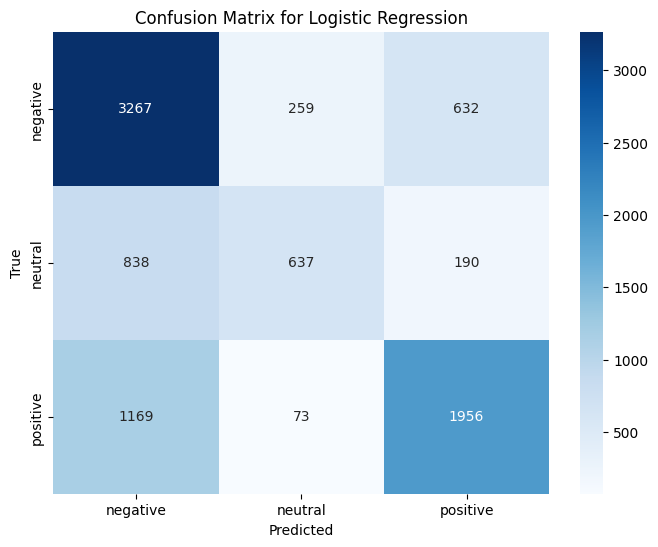


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



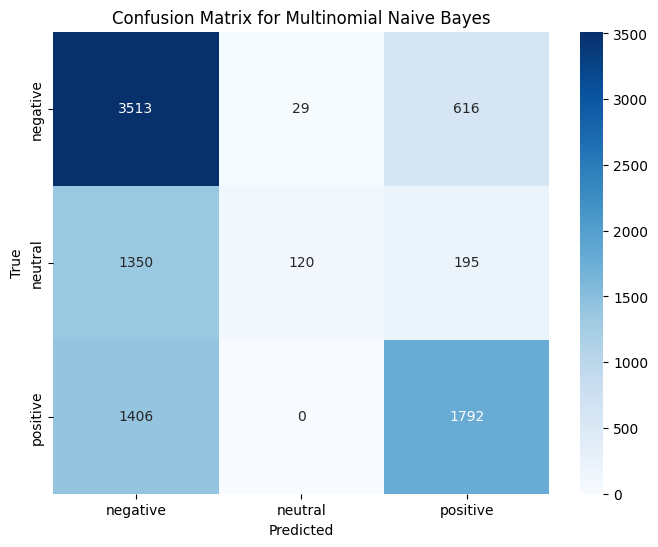


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

          -1       0.56      0.84      0.67      4158
           0       0.81      0.07      0.13      1665
           1       0.69      0.56      0.62      3198

    accuracy                           0.60      9021
   macro avg       0.68      0.49      0.47      9021
weighted avg       0.65      0.60      0.55      9021



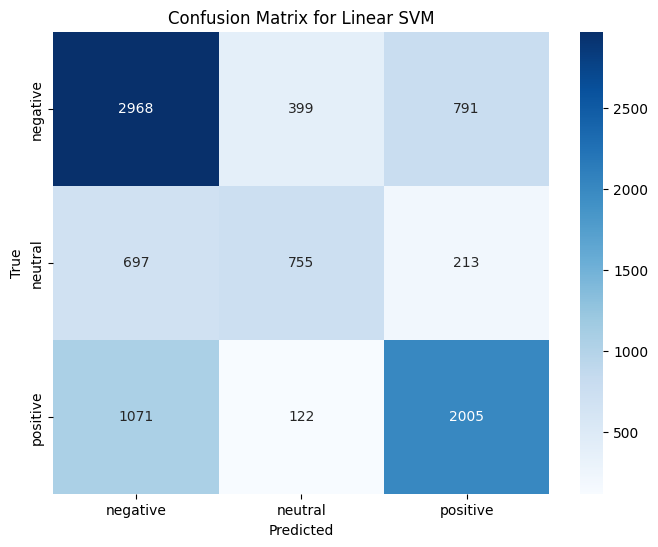


Classification Report for Linear SVM:
               precision    recall  f1-score   support

          -1       0.63      0.71      0.67      4158
           0       0.59      0.45      0.51      1665
           1       0.67      0.63      0.65      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.63      0.63      9021



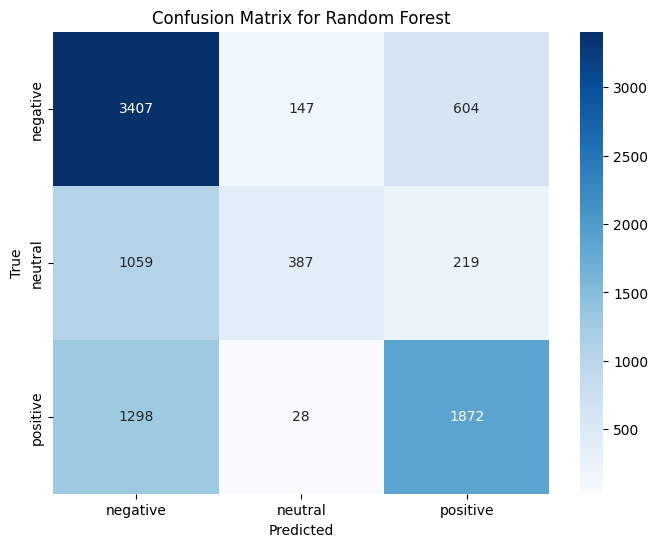


Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       0.59      0.82      0.69      4158
           0       0.69      0.23      0.35      1665
           1       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.65      0.63      0.61      9021



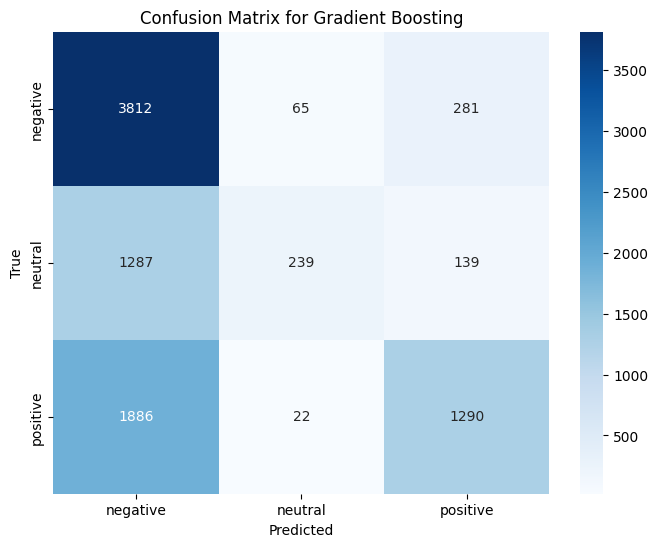


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

          -1       0.55      0.92      0.68      4158
           0       0.73      0.14      0.24      1665
           1       0.75      0.40      0.53      3198

    accuracy                           0.59      9021
   macro avg       0.68      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021

Linear SVM Accuracy: 0.6350


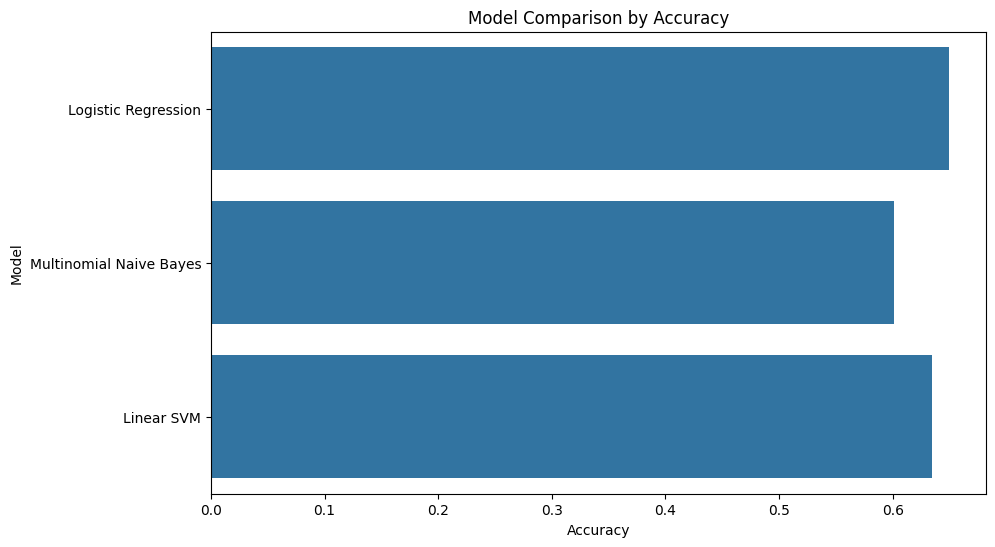

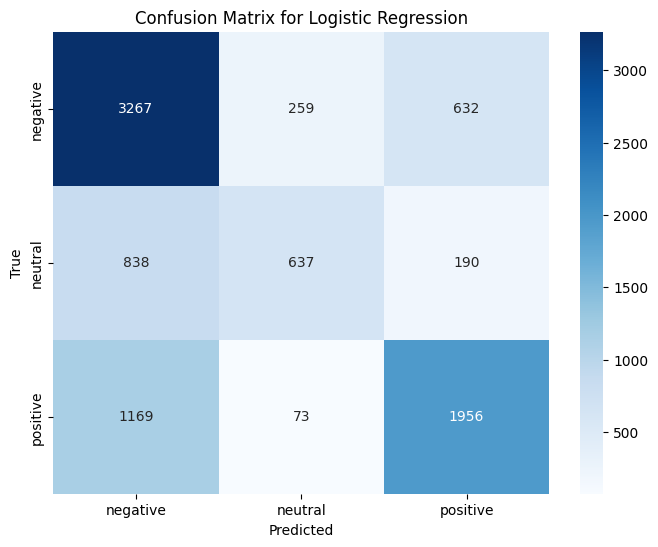


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



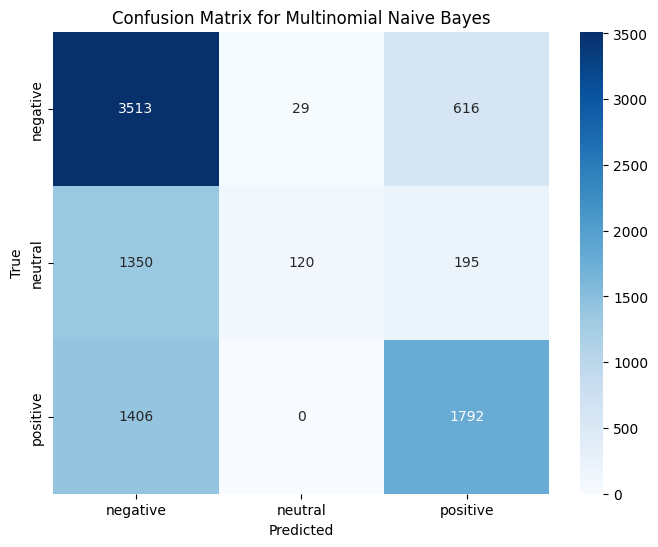


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

          -1       0.56      0.84      0.67      4158
           0       0.81      0.07      0.13      1665
           1       0.69      0.56      0.62      3198

    accuracy                           0.60      9021
   macro avg       0.68      0.49      0.47      9021
weighted avg       0.65      0.60      0.55      9021



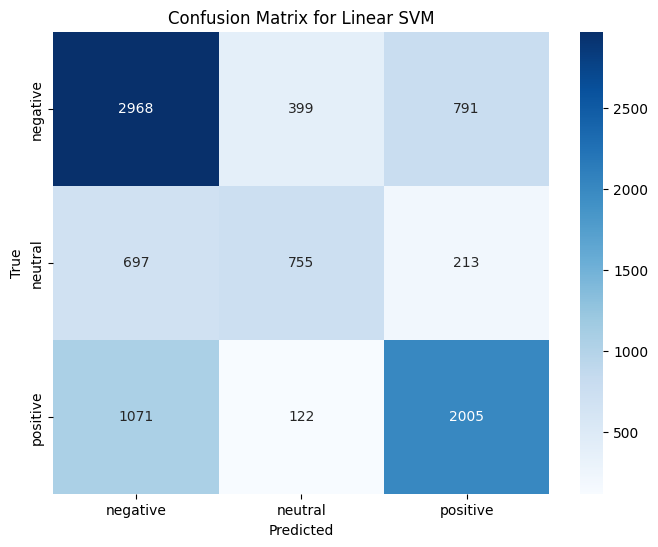


Classification Report for Linear SVM:
               precision    recall  f1-score   support

          -1       0.63      0.71      0.67      4158
           0       0.59      0.45      0.51      1665
           1       0.67      0.63      0.65      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.63      0.63      9021



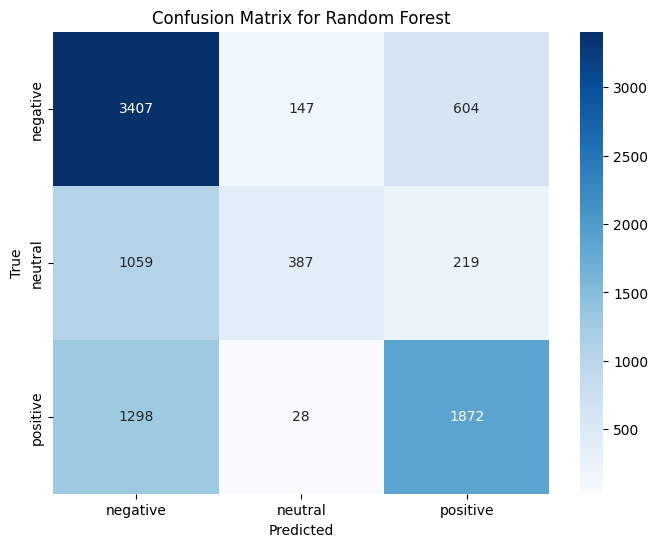


Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       0.59      0.82      0.69      4158
           0       0.69      0.23      0.35      1665
           1       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.65      0.63      0.61      9021



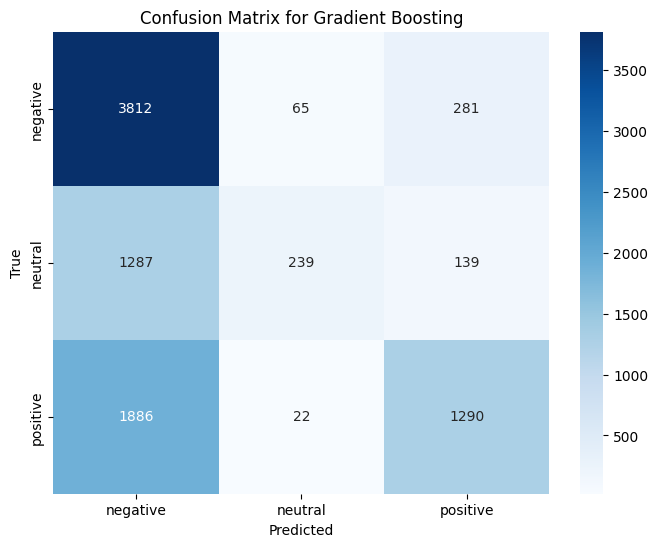


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

          -1       0.55      0.92      0.68      4158
           0       0.73      0.14      0.24      1665
           1       0.75      0.40      0.53      3198

    accuracy                           0.59      9021
   macro avg       0.68      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021

Random Forest Accuracy: 0.6281


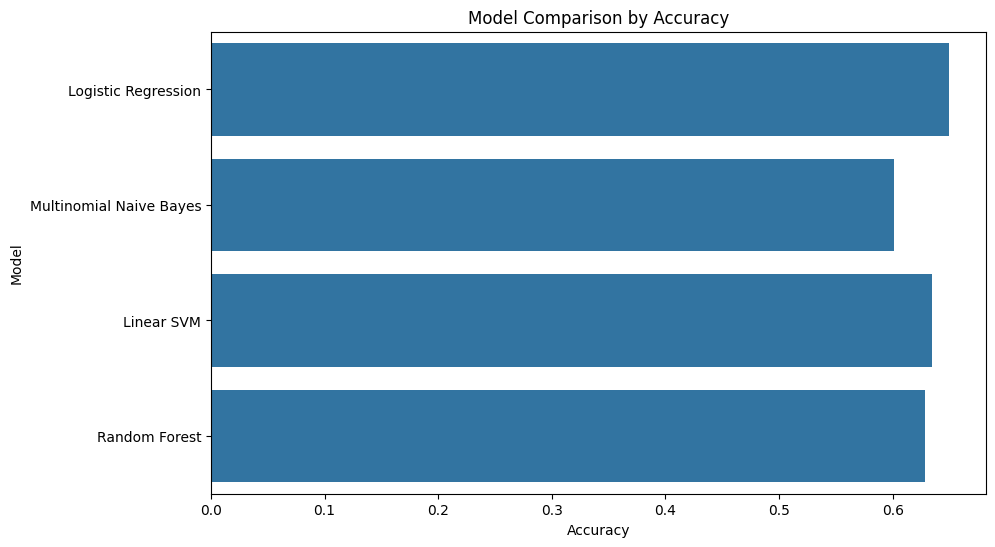

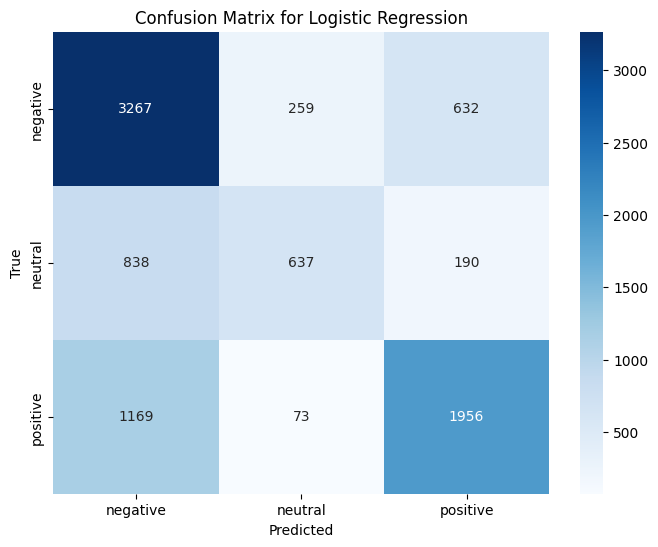


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



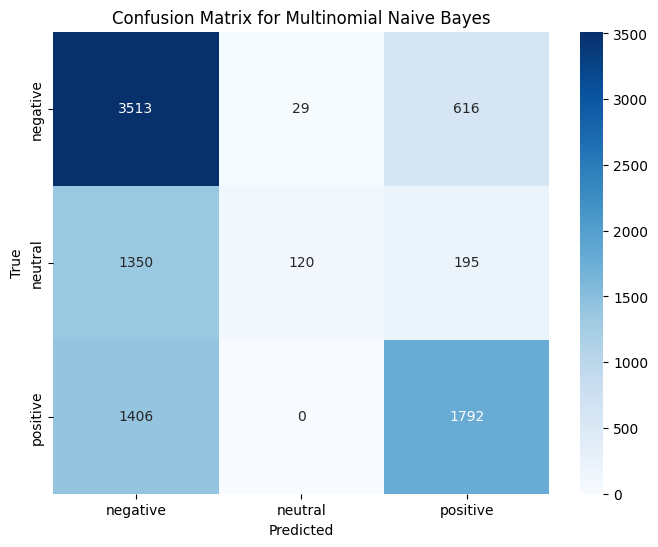


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

          -1       0.56      0.84      0.67      4158
           0       0.81      0.07      0.13      1665
           1       0.69      0.56      0.62      3198

    accuracy                           0.60      9021
   macro avg       0.68      0.49      0.47      9021
weighted avg       0.65      0.60      0.55      9021



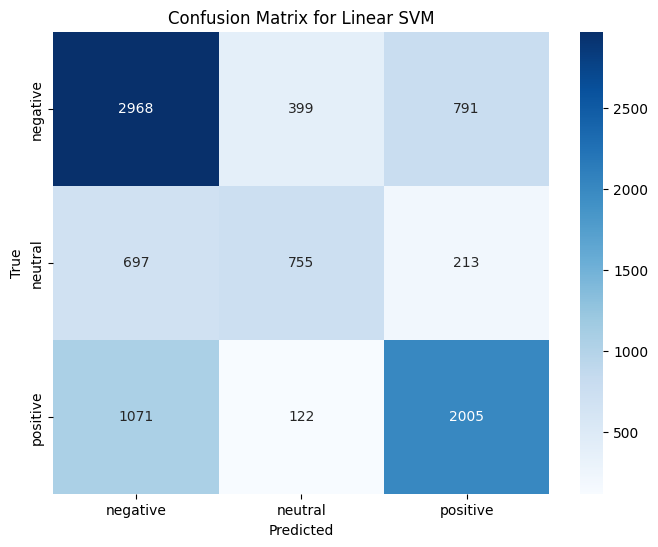


Classification Report for Linear SVM:
               precision    recall  f1-score   support

          -1       0.63      0.71      0.67      4158
           0       0.59      0.45      0.51      1665
           1       0.67      0.63      0.65      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.63      0.63      9021



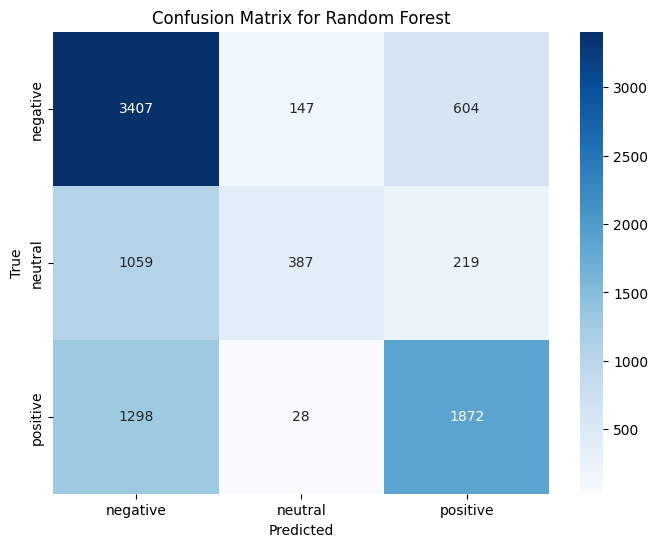


Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       0.59      0.82      0.69      4158
           0       0.69      0.23      0.35      1665
           1       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.65      0.63      0.61      9021



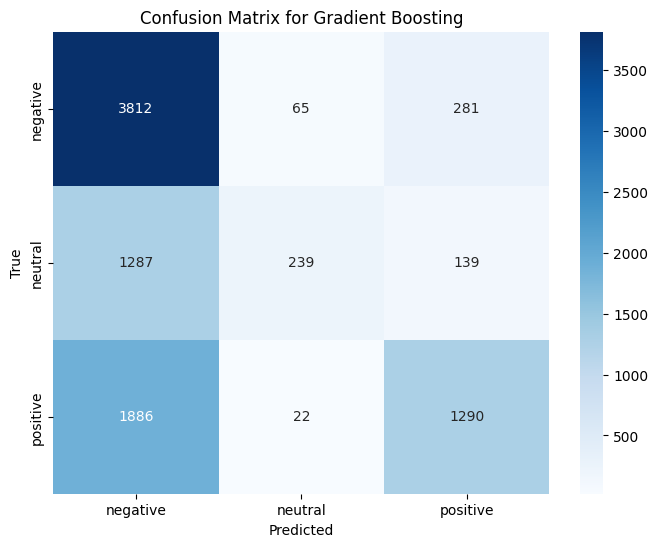


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

          -1       0.55      0.92      0.68      4158
           0       0.73      0.14      0.24      1665
           1       0.75      0.40      0.53      3198

    accuracy                           0.59      9021
   macro avg       0.68      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021

Gradient Boosting Accuracy: 0.5921


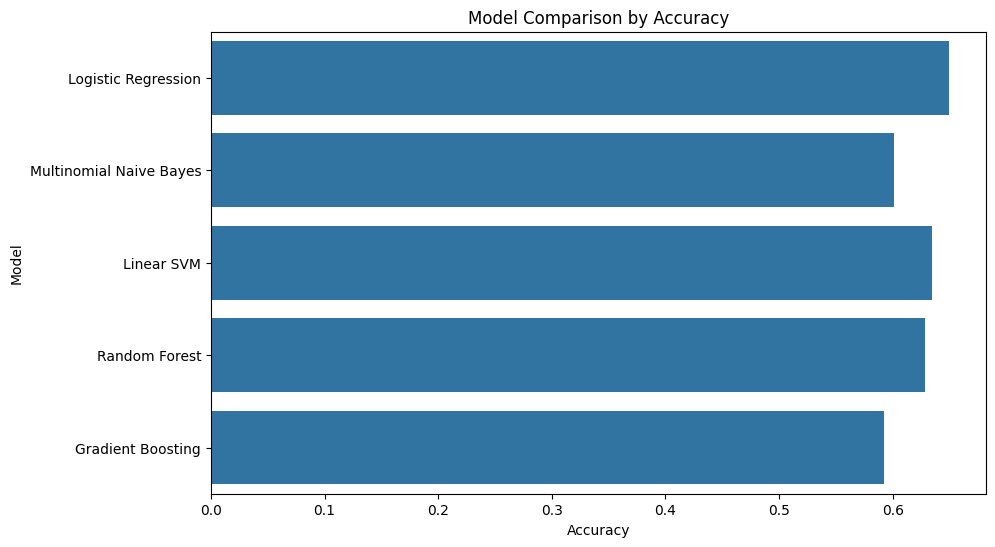

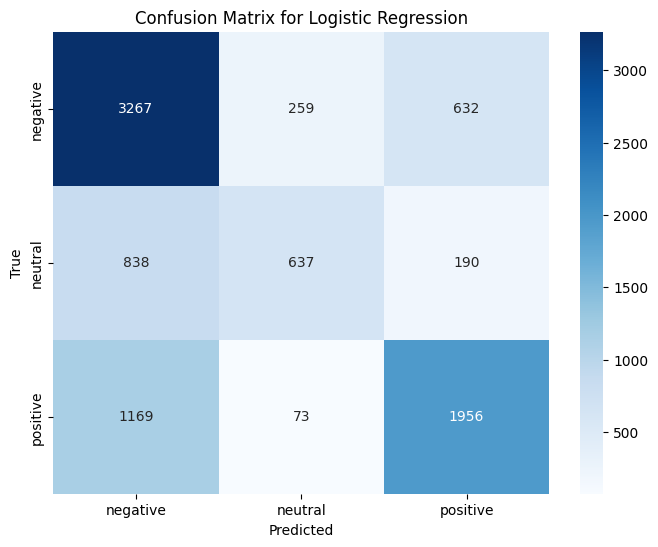


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



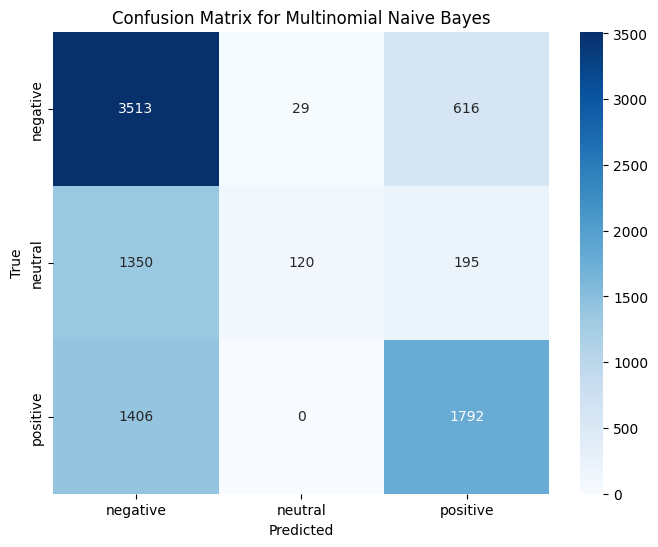


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

          -1       0.56      0.84      0.67      4158
           0       0.81      0.07      0.13      1665
           1       0.69      0.56      0.62      3198

    accuracy                           0.60      9021
   macro avg       0.68      0.49      0.47      9021
weighted avg       0.65      0.60      0.55      9021



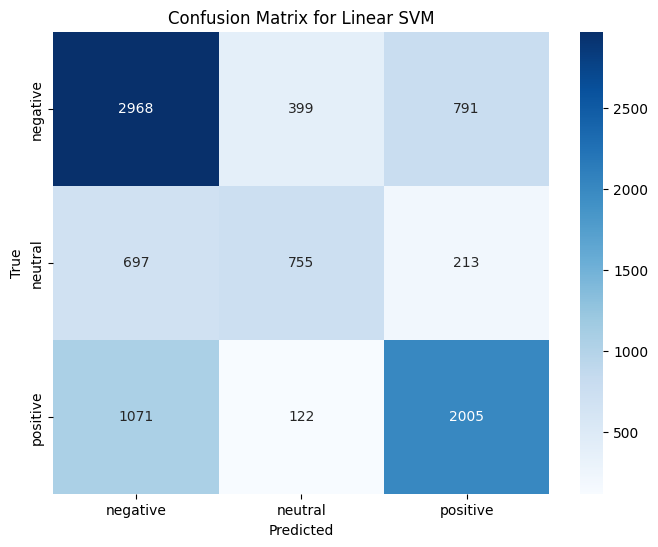


Classification Report for Linear SVM:
               precision    recall  f1-score   support

          -1       0.63      0.71      0.67      4158
           0       0.59      0.45      0.51      1665
           1       0.67      0.63      0.65      3198

    accuracy                           0.63      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.63      0.63      9021



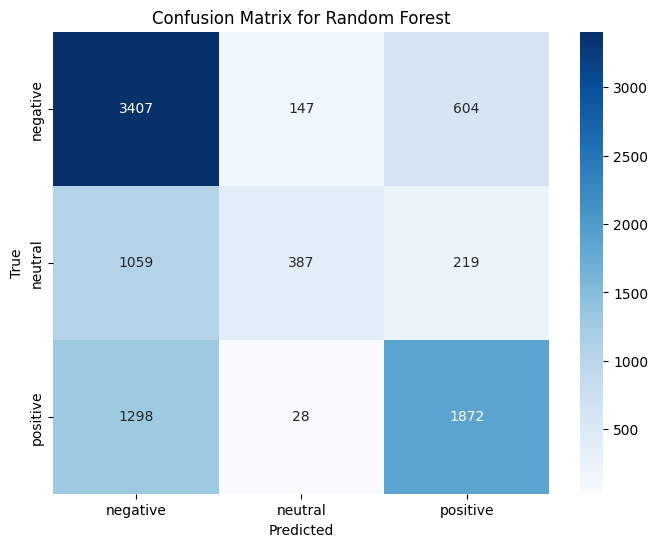


Classification Report for Random Forest:
               precision    recall  f1-score   support

          -1       0.59      0.82      0.69      4158
           0       0.69      0.23      0.35      1665
           1       0.69      0.59      0.64      3198

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.65      0.63      0.61      9021



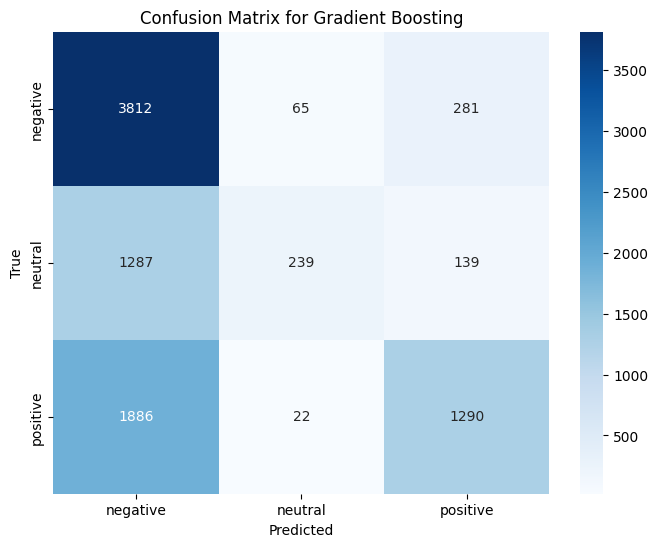


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

          -1       0.55      0.92      0.68      4158
           0       0.73      0.14      0.24      1665
           1       0.75      0.40      0.53      3198

    accuracy                           0.59      9021
   macro avg       0.68      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021



In [103]:
plot_model_comparison(models_binary, X_test, y_test_binary)

In [ ]:
# Train a Logistic Regression model for the binary classification
model_binary = LogisticRegression(max_iter=100)
model_binary.fit(X_train, y_train_binary)
y_pred_binary = model_binary.predict(X_test)

In [ ]:
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"Binary Classification Accuracy: {accuracy_binary}")

Binary Classification Accuracy: 0.6495953885378561


In [ ]:
print("Binary Classification Metrics:")
print(classification_report(y_test_binary, y_pred_binary))

Binary Classification Metrics:
              precision    recall  f1-score   support

          -1       0.62      0.79      0.69      4158
           0       0.66      0.38      0.48      1665
           1       0.70      0.61      0.65      3198

    accuracy                           0.65      9021
   macro avg       0.66      0.59      0.61      9021
weighted avg       0.66      0.65      0.64      9021



In [ ]:
# Train a modefive-point classification(random forest)
model_three = RandomForestClassifier(n_estimators=100)
model_three.fit(X_train, y_train_three)
y_pred_three = model_three.predict(X_test)

In [ ]:
accuracy_three = accuracy_score(y_test_three, y_pred_three)

In [ ]:
print(accuracy_three)

0.6284225695599157


In [ ]:
print("\nthree-Point Classification Metrics:")
print(classification_report(y_test_three, y_pred_three))


three-Point Classification Metrics:
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      4158
           1       0.69      0.58      0.63      3198
           2       0.67      0.24      0.35      1665

    accuracy                           0.63      9021
   macro avg       0.65      0.55      0.56      9021
weighted avg       0.64      0.63      0.61      9021



#Subtasks D-E

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [105]:
data_binary = data[data['sentiment_binary_mapping'] != -1]

In [106]:
data_binary

,tweet_id,sentiment,text,topic,processed_text,topic_processed,sentiment_three,sentiment_binary_mapping
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,general,felt privileged play foo fighter song guitar t...,general,1,1
1,796528524030124618,positive,"""@AaqibAfzaal Pakistan may be an Islamic count...",AaqibAfzaal,pakistan may islamic country der lot true musl...,aaqibafzaal,1,1
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,tjvictoriacnd,happy birthday coolest golfer bali may become ...,tjvictoriacnd,1,1
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,SimpplyA,tmills going tucson th thursday,simpplya,2,0
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,BlackLivesMatter,hmmmmm blacklivesmatter matter like rise kid d...,blacklivesmatter,2,0
...,...,...,...,...,...,...,...,...
45092,638667710398891068,positive,Someone should tell frank ocean that tomorrow ...,general,someone tell frank ocean tomorrow would great ...,general,1,1
45093,103623466461181268,positive,All I know is I'm going to see Sam Smith tomor...,general,know im going see sam smith tomorrow like hone...,general,1,1
45094,545294706128695213,positive,@JBcommentator Zlatan has many career highligh...,JBcommentator,zlatan many career highlightsi think may trump...,jbcommentator,1,1
45098,681369726697754114,positive,"9 September has arrived, which means Apple's n...",general,september arrived mean apple new iphone hour a...,general,1,1


In [107]:
# Prepare data
X = data_binary['processed_text']
y = data_binary['sentiment_binary_mapping']

In [108]:
X

,processed_text
0,felt privileged play foo fighter song guitar t...
1,pakistan may islamic country der lot true musl...
2,happy birthday coolest golfer bali may become ...
3,tmills going tucson th thursday
4,hmmmmm blacklivesmatter matter like rise kid d...
...,...
45092,someone tell frank ocean tomorrow would great ...
45093,know im going see sam smith tomorrow like hone...
45094,zlatan many career highlightsi think may trump...
45098,september arrived mean apple new iphone hour a...


In [109]:
y

,sentiment_binary_mapping
0,1
1,1
2,1
3,0
4,0
...,...
45092,1
45093,1
45094,1
45098,1


In [110]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [111]:
# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [112]:
print(X_train_vec)

  (0, 21450)	0.2277536147033604
  (0, 12934)	0.3742405429773753
  (0, 6871)	0.3742405429773753
  (0, 12818)	0.25127879996119484
  (0, 8457)	0.18115415529235251
  (0, 13165)	0.33265641910585975
  (0, 17661)	0.22928612925012234
  (0, 20106)	0.38325283327040827
  (0, 7556)	0.30466168849315517
  (0, 15579)	0.4112475638831129
  (1, 14687)	0.3409252024701127
  (1, 18306)	0.35914179559197706
  (1, 19643)	0.3520753020357669
  (1, 12493)	0.15094837012535836
  (1, 8398)	0.39465576698550386
  (1, 9944)	0.3322765133342815
  (1, 2116)	0.26837712722236046
  (1, 8885)	0.25266194453031915
  (1, 9901)	0.23168856868349982
  (1, 20502)	0.1528303951264073
  (1, 15231)	0.35914179559197706
  (2, 21188)	0.39146928223190786
  (2, 11343)	0.4423217085629569
  (2, 13440)	0.17652907302442955
  (2, 23495)	0.35833456330216235
  :	:
  (19447, 13440)	0.21817969872743703
  (19447, 13107)	0.15550102954715264
  (19447, 3181)	0.24963967852598076
  (19447, 9269)	0.1862331210748792
  (19447, 687)	0.20333000036442103
  (194

In [113]:
print(X_test_vec)

  (0, 8860)	0.2616598913402188
  (0, 8893)	0.2771549082929823
  (0, 10474)	0.2455232452226685
  (0, 14771)	0.37023813976881886
  (0, 14796)	0.33530264507640534
  (0, 19213)	0.250782435066399
  (0, 21202)	0.42840616086107913
  (0, 21412)	0.4056148900849692
  (0, 23796)	0.36604144947444206
  (1, 3497)	0.3128452592238967
  (1, 5204)	0.3513603890071301
  (1, 5430)	0.40181017753590503
  (1, 6054)	0.2951451209246742
  (1, 10133)	0.2862341129649754
  (1, 10135)	0.4953238167866438
  (1, 11513)	0.28410065251085154
  (1, 14581)	0.2633851000341758
  (1, 17634)	0.22967611339182784
  (2, 1943)	0.2791447430290553
  (2, 2643)	0.2720630585305767
  (2, 3271)	0.17073106433811597
  (2, 5653)	0.3685811291932639
  (2, 8348)	0.2257872548001619
  (2, 12305)	0.2878120243756223
  (2, 14646)	0.3955041641324778
  :	:
  (4861, 4206)	0.2044302742528818
  (4861, 8045)	0.2944409716861385
  (4861, 8625)	0.17904887138193887
  (4861, 8835)	0.25441858032805553
  (4861, 8893)	0.18492627917953183
  (4861, 10086)	0.2208668

In [114]:
model_binary = LogisticRegression(max_iter=1000)
model_binary.fit(X_train_vec, y_train)
y_pred_binary = model_binary.predict(X_test_vec)

In [115]:
print(model_binary)

LogisticRegression(max_iter=1000)


In [116]:
print("\nTwo-Point Scale (Positive/Negative) Classification Metrics:")
print(classification_report(y_test, y_pred_binary))


Two-Point Scale (Positive/Negative) Classification Metrics:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1665
           1       0.85      0.94      0.89      3198

    accuracy                           0.85      4863
   macro avg       0.85      0.81      0.83      4863
weighted avg       0.85      0.85      0.85      4863



In [117]:
sentiment_three_mapping = {
    'positive': 1,
    'negative': 2,
    'neutral': 0
}

In [118]:
data['sentiment_three'] = data['sentiment'].map(sentiment_three_mapping).fillna(-1).astype(int)
data_three = data[data['sentiment_three'] != -1]

In [119]:
data_three['sentiment_three'].value_counts()

,count
sentiment_three,
0,20789
1,15986
2,8326


In [120]:
X = data_three['processed_text']
y = data_three['sentiment_three']

In [121]:
print(X, y)

0        felt privileged play foo fighter song guitar t...
1        pakistan may islamic country der lot true musl...
2        happy birthday coolest golfer bali may become ...
3                          tmills going tucson th thursday
4        hmmmmm blacklivesmatter matter like rise kid d...
                               ...                        
45096    sunday cinema paul mccartney amp david gilmour...
45097    aug day independence day sacrifice muslim vict...
45098    september arrived mean apple new iphone hour a...
45099    ill see tomorrow fun filled feeding league pro...
45100    alright who choosing paul mccartney weeknd tom...
Name: processed_text, Length: 45101, dtype: object 0        1
1        1
2        1
3        2
4        2
        ..
45096    0
45097    0
45098    1
45099    1
45100    0
Name: sentiment_three, Length: 45101, dtype: int64


In [122]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [123]:
print(X_train, X_test, y_train, y_test)

24648    miss sarah palin bigger deal easy make fun sat...
13605    rush limbaugh rbi big krit halo sometimesyouha...
33708    landlord landlady muslim tomorrow steal addres...
30577                                 may bought minecraft
735      listening whopper morning run happy thursday f...
                               ...                        
36053    disgrace game came japan th march smhnaruto ga...
27485    according report lion rookie rb mikel leshoure...
1258     cool cool managed get ct sun pic black star av...
18452    jason aldean concert thursday night guess day ...
9900     galaxynote smartphone samsung galaxy note upda...
Name: processed_text, Length: 36080, dtype: object 15828    fact see rationale charlie hebdo attack policy...
28301                               shade lol mariahsworld
7855     wouldnt regretted selling pires st season thin...
19052    packing punch janet jackson released album art...
16686    know sarah palin trending topic friday hour ph...
     

In [124]:
# Vectorize text
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [125]:
print(X_train_vec, X_test_vec)

  (0, 20681)	0.24473603614147604
  (0, 28193)	0.29630788096651023
  (0, 23710)	0.30438151277803727
  (0, 3348)	0.34081221966294845
  (0, 7874)	0.26685553060349887
  (0, 9603)	0.3255676070592801
  (0, 19425)	0.19318282313982812
  (0, 12294)	0.2705360759534082
  (0, 28244)	0.18957613629753578
  (0, 22130)	0.17080201902760178
  (0, 18677)	0.2275633845785878
  (0, 13256)	0.20579008062795356
  (0, 12236)	0.2898548999740788
  (0, 19129)	0.335449504229216
  (1, 27890)	0.2927233045802094
  (1, 18544)	0.36772960201154015
  (1, 26310)	0.27272480204517086
  (1, 3340)	0.17812430283838315
  (1, 17745)	0.34965866978185856
  (1, 13860)	0.3288651690395727
  (1, 30076)	0.3820733078658098
  (1, 17912)	0.2972455291628688
  (1, 22856)	0.3217662562805666
  (1, 26390)	0.1831184503087587
  (1, 13119)	0.13858253509330523
  :	:
  (36077, 12733)	0.15555939347574652
  (36077, 3490)	0.2229357748535147
  (36077, 19500)	0.33215408683761116
  (36077, 6823)	0.508907620307093
  (36077, 7359)	0.3341589938226277
  (3607

In [146]:
models = {
    #"Logistic Regression": LogisticRegression(max_iter=100, C=1.0),
    #"Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

In [147]:
best_accuracy = 0
best_model_name = ""
best_model = None
best_y_pred = None

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [149]:
for name, model in models.items():

  print(f"\nTraining {name}...")
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy:.4f}")
  if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model
        best_y_pred = y_pred


Training Linear SVM...
Linear SVM Accuracy: 0.6352

Training Random Forest...
Random Forest Accuracy: 0.6279

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5926


In [151]:
def plot_model_comparison(models, X_test, y_test, model_names):
    accuracy_scores = {}
    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[name] = accuracy

        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()))
        plt.xlabel("Accuracy")
        plt.ylabel("Model")
        plt.title("Model Comparison by Accuracy")
        plt.show()

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(df['sentiment'].unique()),
                    yticklabels=sorted(df['sentiment'].unique()))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {model_names[i]}')
        plt.show()

        print(f"\nClassification Report for {model_names[i]}:\n", classification_report(y_test, y_pred))

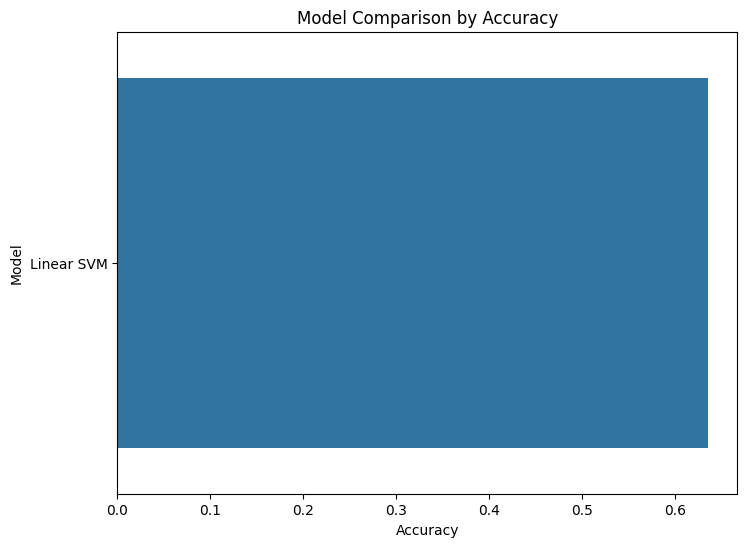

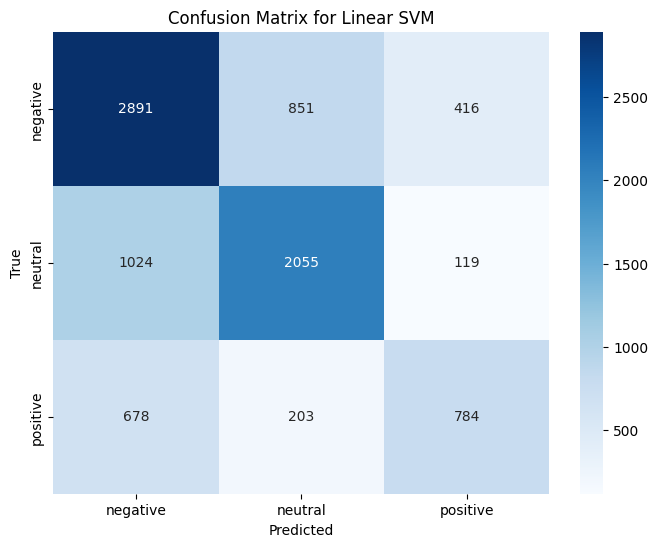


Classification Report for Linear SVM:
               precision    recall  f1-score   support

           0       0.63      0.70      0.66      4158
           1       0.66      0.64      0.65      3198
           2       0.59      0.47      0.53      1665

    accuracy                           0.64      9021
   macro avg       0.63      0.60      0.61      9021
weighted avg       0.63      0.64      0.63      9021



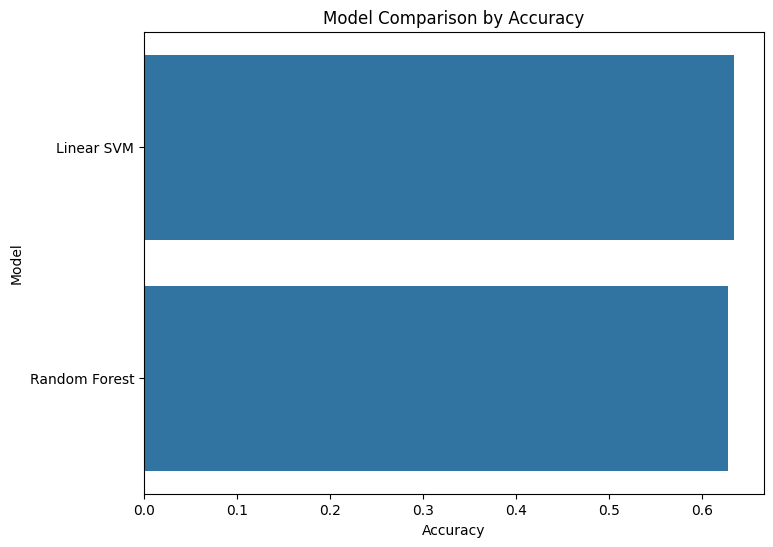

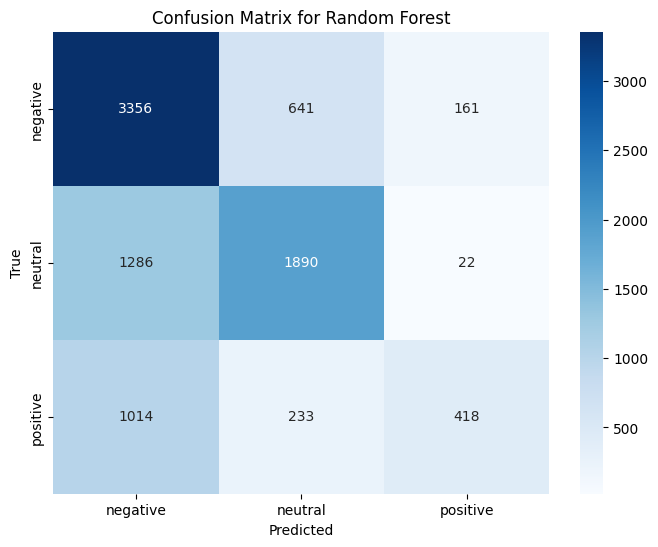


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.59      0.81      0.68      4158
           1       0.68      0.59      0.63      3198
           2       0.70      0.25      0.37      1665

    accuracy                           0.63      9021
   macro avg       0.66      0.55      0.56      9021
weighted avg       0.64      0.63      0.61      9021



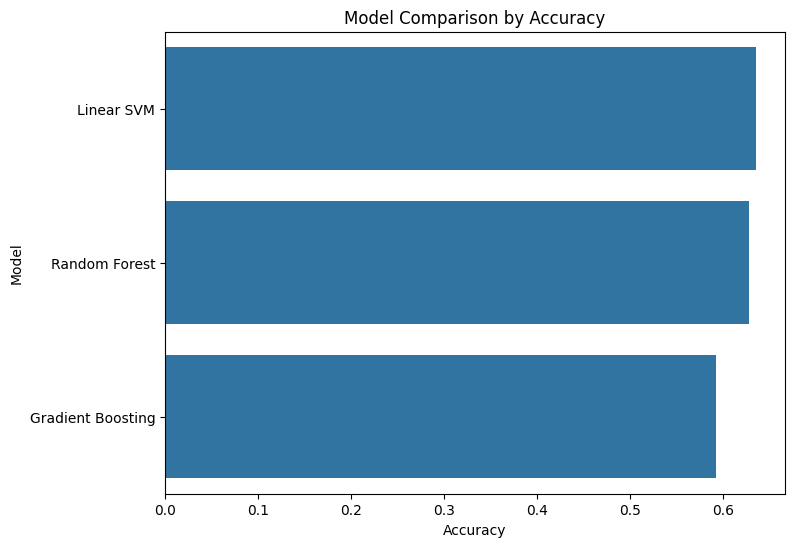

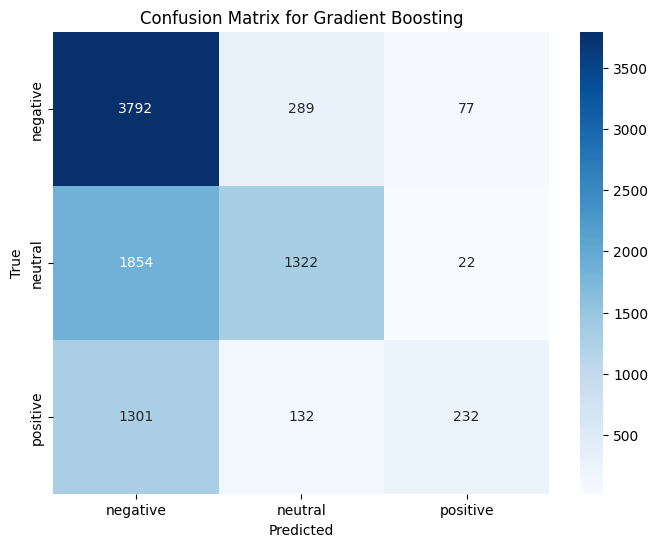


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.55      0.91      0.68      4158
           1       0.76      0.41      0.54      3198
           2       0.70      0.14      0.23      1665

    accuracy                           0.59      9021
   macro avg       0.67      0.49      0.48      9021
weighted avg       0.65      0.59      0.55      9021



In [152]:
model_names = list(models.keys())
plot_model_comparison(models, X_test_vec, y_test, model_names)

In [ ]:
model_three = RandomForestClassifier(n_estimators=100)
model_three.fit(X_train_vec, y_train)
y_pred_three = model_three.predict(X_test_vec)

In [ ]:
# Evaluate the model
print("\nthree-Point Scale Classification Metrics:")
print(classification_report(y_test, y_pred_three))


three-Point Scale Classification Metrics:
              precision    recall  f1-score   support

           0       0.59      0.80      0.68      4158
           1       0.68      0.60      0.64      3198
           2       0.68      0.25      0.36      1665

    accuracy                           0.63      9021
   macro avg       0.65      0.55      0.56      9021
weighted avg       0.64      0.63      0.61      9021

